<h1>The code for C19 NRG project!</h1>

In [1]:
import numpy as np
import pandas as pd

Importing the COVID dataset

In [2]:
covid_data = pd.read_csv("WHO-COVID-19-global-data.csv")

Extracting the data about the 3 countries of interest. Then dropping the Country code and WHO region. Finally, do a check to see if all 3 countries have equal row counts.

In [3]:
ICD = covid_data[(covid_data["Country"] == "Latvia") | (covid_data["Country"] == "Estonia") | (covid_data["Country"] == "Lithuania")]
ICD.reset_index(drop=True, inplace = True)

ICD_dropped = ICD.drop(["Country_code", "WHO_region"], axis = 1)
country_counts = ICD_dropped['Country'].value_counts()
print(country_counts)

Estonia      1407
Latvia       1407
Lithuania    1407
Name: Country, dtype: int64


Importing the energy consumption datasets and check for missing values

In [4]:
energy_EE = pd.read_csv("estonia2018_2022.csv")
energy_LT = pd.read_csv("Lithunia2018_2022.csv")
energy_LV = pd.read_csv("latvia2018_2022.csv")

rows_with_nan_EE = energy_EE[energy_EE.isna().any(axis=1)]
rows_with_nan_LT = energy_LT[energy_LT.isna().any(axis=1)]
rows_with_nan_LV = energy_LV[energy_LV.isna().any(axis=1)]
print(rows_with_nan_EE, "\n")
print(rows_with_nan_LT, "\n")
print(rows_with_nan_LV)

Empty DataFrame
Columns: [Period, Consumption]
Index: [] 

                      Date  Consumption
39178  2022-06-21 11:00:00          NaN 

      DateTime  Consumption
17336      NaN          NaN
17337      NaN          NaN
17338      NaN          NaN
17339      NaN          NaN
17340      NaN          NaN
17341      NaN          NaN
17342      NaN          NaN
17343      NaN          NaN
17344      NaN          NaN
17345      NaN          NaN
17346      NaN          NaN
17347      NaN          NaN
17348      NaN          NaN
17349      NaN          NaN
17350      NaN          NaN
17351      NaN          NaN
17352      NaN          NaN
17353      NaN          NaN
17354      NaN          NaN
17355      NaN          NaN
17356      NaN          NaN
17357      NaN          NaN
17358      NaN          NaN


Trying to fix the missing values for LT and LV datasets. After checking source for LT dataset, the value is simply missing, therefore the row is deleted and we assume that the value is account for in some other hour of the day.

In [5]:
energy_LT = energy_LT.drop(39178)
energy_LV.reset_index()
print(energy_LT.iloc[39175:39180])

                      Date  Consumption
39175  2022-06-21 08:00:00     1477.449
39176  2022-06-21 09:00:00     1499.078
39177  2022-06-21 10:00:00     1488.625
39179  2022-06-21 12:00:00     1489.681
39180  2022-06-21 13:00:00     1509.407


There is no actual missing data, it is simply some error between the switch from 2019 to 2020. Both 12/31/2019 and 1/1/2020 are accounted for

In [6]:
energy_LV = energy_LV.drop(list(range(17336, 17359)))
energy_LV.reset_index()
print(energy_LV.iloc[17332:17361])


               DateTime  Consumption
17332  12/31/2019 20:00        818.0
17333  12/31/2019 21:00        756.0
17334  12/31/2019 22:00        710.0
17335  12/31/2019 23:00        652.0
17359     1/1/2020 0:00        676.0
17360     1/1/2020 1:00        650.0
17361     1/1/2020 2:00        614.0
17362     1/1/2020 3:00        613.0
17363     1/1/2020 4:00        598.0
17364     1/1/2020 5:00        622.0
17365     1/1/2020 6:00        620.0
17366     1/1/2020 7:00        655.0
17367     1/1/2020 8:00        621.0
17368     1/1/2020 9:00        660.0
17369    1/1/2020 10:00        692.0
17370    1/1/2020 11:00        726.0
17371    1/1/2020 12:00        728.0
17372    1/1/2020 13:00        734.0
17373    1/1/2020 14:00        732.0
17374    1/1/2020 15:00        759.0
17375    1/1/2020 16:00        849.0
17376    1/1/2020 17:00        833.0
17377    1/1/2020 18:00        833.0
17378    1/1/2020 19:00        813.0
17379    1/1/2020 20:00        791.0
17380    1/1/2020 21:00        755.0
1

Defining a function that coerces all of the datetime columns to one standard and one name.

In [7]:
def DateTimeCoercion(df, colname):
    df["DateTime"] = pd.to_datetime(df[f"{colname}"], errors = 'coerce')
    if colname == "DateTime":
        return
    else:
        df.drop([f"{colname}"], axis = 1, inplace = True)
        
    target_column = "DateTime"
    if target_column in df.columns:
        df.insert(0, target_column, df.pop(target_column))


Coercing all datetimes

In [8]:
DateTimeCoercion(energy_EE, "Period")
DateTimeCoercion(energy_LT, "Date")
DateTimeCoercion(energy_LV, "DateTime")

Checking if done successfully

In [9]:
print(energy_EE.head())
print(energy_LT.head())
print(energy_LV.head())
print(len(energy_LV))

             DateTime  Consumption
0 2018-01-01 00:00:00     829.7639
1 2018-01-01 01:00:00     815.4053
2 2018-01-01 02:00:00     786.5032
3 2018-01-01 03:00:00     780.0486
4 2018-01-01 04:00:00     778.6814
             DateTime  Consumption
0 2018-01-01 00:00:00      1139.95
1 2018-01-01 01:00:00      1101.76
2 2018-01-01 02:00:00      1051.43
3 2018-01-01 03:00:00      1012.91
4 2018-01-01 04:00:00       989.41
             DateTime  Consumption
0 2018-01-01 00:00:00        671.0
1 2018-01-01 01:00:00        659.0
2 2018-01-01 02:00:00        631.0
3 2018-01-01 03:00:00        612.0
4 2018-01-01 04:00:00        596.0
43617


In [10]:
print(energy_EE.tail())
print(energy_LT.tail())
print(energy_LV.tail())

                 DateTime  Consumption
43819 2022-12-31 19:00:00        932.5
43820 2022-12-31 20:00:00        889.5
43821 2022-12-31 21:00:00        846.5
43822 2022-12-31 22:00:00        817.6
43823 2022-12-31 23:00:00        798.2
                 DateTime  Consumption
43819 2022-12-31 19:00:00     1418.083
43820 2022-12-31 20:00:00     1282.263
43821 2022-12-31 21:00:00     1198.688
43822 2022-12-31 22:00:00     1136.912
43823 2022-12-31 23:00:00     1078.816
                 DateTime  Consumption
43635 2022-12-31 19:00:00        777.0
43636 2022-12-31 20:00:00        737.0
43637 2022-12-31 21:00:00        695.0
43638 2022-12-31 22:00:00        667.0
43639 2022-12-31 23:00:00        637.0


Check if any values are missing from any one dataframe. There are some missing but a small amount, at most 1 day. We are assuming that this will not significantly impact the overall results. The sources also do not contain this data, but we are hoping that it is accounted for in different days of the week.

In [11]:
merged_df = pd.merge(energy_EE, energy_LT, on='DateTime', how='outer', suffixes=('_EE', '_LT'))
merged_df = pd.merge(merged_df, energy_LV, on='DateTime', how='outer')

non_matching_rows = merged_df[merged_df.isnull().any(axis=1)]

print(non_matching_rows)

                 DateTime  Consumption_EE  Consumption_LT  Consumption
720   2018-01-31 00:00:00        920.8711        1186.710          NaN
721   2018-01-31 01:00:00        888.8176        1134.700          NaN
722   2018-01-31 02:00:00        879.1761        1114.090          NaN
723   2018-01-31 03:00:00        890.5610        1116.070          NaN
724   2018-01-31 04:00:00        889.2788        1139.290          NaN
...                   ...             ...             ...          ...
43839 2018-03-25 02:00:00             NaN        1069.910          NaN
43840 2019-03-31 02:00:00             NaN        1020.970          NaN
43841 2020-03-29 02:00:00             NaN         936.390          NaN
43842 2021-03-28 02:00:00             NaN        1004.119          NaN
43843 2022-03-27 02:00:00             NaN        1139.102          NaN

[218 rows x 4 columns]


Calculating daily and weekly consumption for each country

In [12]:
dc_EE = energy_EE.groupby(energy_EE['DateTime'].dt.date)['Consumption'].sum().reset_index()
dc_EE.rename(columns = {"DateTime" : "Date"}, inplace = True)
dc_EE["Date"] = pd.to_datetime(dc_EE["Date"], errors='coerce')

dc_EE.set_index('Date', inplace=True)
weekly_sum_EE = dc_EE.resample('W').sum()
weekly_sum_EE.reset_index(inplace=True)

weekly_sum_EE.head()

Date  Consumption
0 2018-01-07  169286.5881
1 2018-01-14  190721.2722
2 2018-01-21  201737.6826
3 2018-01-28  189070.2842
4 2018-02-04  186837.9225

In [13]:
dc_LT = energy_LT.groupby(energy_LT['DateTime'].dt.date)['Consumption'].sum().reset_index()
dc_LT.rename(columns = {"DateTime" : "Date"}, inplace = True)
dc_LT["Date"] = pd.to_datetime(dc_LT["Date"], errors='coerce')

dc_LT.set_index('Date', inplace=True)
weekly_sum_LT = dc_LT.resample('W').sum()

weekly_sum_LT.head()

Consumption
Date                   
2018-01-07    233098.11
2018-01-14    256354.84
2018-01-21    262044.67
2018-01-28    260927.97
2018-02-04    251129.51

In [14]:
dc_LV = energy_LV.groupby(energy_LV['DateTime'].dt.date)['Consumption'].sum().reset_index()
dc_LV.rename(columns = {"DateTime" : "Date"}, inplace = True)
dc_LV["Date"] = pd.to_datetime(dc_LV["Date"], errors='coerce')

dc_LV.set_index('Date', inplace=True)
weekly_sum_LV = dc_LV.resample('W').sum()

weekly_sum_LV.head()

Consumption
Date                   
2018-01-07     143167.0
2018-01-14     156984.0
2018-01-21     163167.0
2018-01-28     160573.0
2018-02-04     132545.0

Making the date reported into datetime type

In [15]:
ICD_dropped.head()

Date_reported  Country  New_cases  Cumulative_cases  New_deaths  \
0    2020-01-03  Estonia          0                 0           0   
1    2020-01-04  Estonia          0                 0           0   
2    2020-01-05  Estonia          0                 0           0   
3    2020-01-06  Estonia          0                 0           0   
4    2020-01-07  Estonia          0                 0           0   

   Cumulative_deaths  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [16]:
ICD_dropped["Date_reported"] = pd.to_datetime(ICD_dropped["Date_reported"], errors='coerce')
ICD_dropped.head()


Date_reported  Country  New_cases  Cumulative_cases  New_deaths  \
0    2020-01-03  Estonia          0                 0           0   
1    2020-01-04  Estonia          0                 0           0   
2    2020-01-05  Estonia          0                 0           0   
3    2020-01-06  Estonia          0                 0           0   
4    2020-01-07  Estonia          0                 0           0   

   Cumulative_deaths  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

Extracting New_cases for each country and summing them for weekly reports (New_cases is now New_cases per week).
Summing was done because Latvia and Estonia reported new cases weekly instead of daily.

In [17]:
unique_countries = ICD_dropped['Country'].unique()
ICD_dropped.rename(columns = {"Date_reported" : "Date"}, inplace = True)
Dataframe_dict = {}

for country in unique_countries:
    country_df = ICD_dropped[ICD_dropped['Country'] == country].copy()
    country_df.reset_index(inplace=True)
    country_df.set_index('Date', inplace=True)
    country_df_weeklysummed = country_df[["New_cases"]].resample('W').sum()
    
    Dataframe_dict[country] = country_df_weeklysummed
#print(dfs_by_country)
CoVData_EE = Dataframe_dict['Estonia']
CoVData_LT = Dataframe_dict['Lithuania']
CoVData_LV = Dataframe_dict['Latvia']

In [18]:
CoVData_LV.head()

New_cases
Date                 
2020-01-05          0
2020-01-12          0
2020-01-19          0
2020-01-26          0
2020-02-02          0

In [19]:
merged_data_EE = pd.merge(CoVData_EE, weekly_sum_EE, on='Date', how='inner')
merged_data_LT = pd.merge(CoVData_LT, weekly_sum_LT, on='Date', how='inner')
merged_data_LV = pd.merge(CoVData_LV, weekly_sum_LV, on='Date', how='inner')

In [20]:
merged_data_EE.reset_index(inplace=True)
merged_data_LT.reset_index(inplace=True)
merged_data_LV.reset_index(inplace=True)
merged_data_EE.head()

index       Date  New_cases  Consumption
0      0 2020-01-05          0     159663.6
1      1 2020-01-12          0     177557.6
2      2 2020-01-19          0     175578.3
3      3 2020-01-26          0     176213.4
4      4 2020-02-02          0     177102.0

In [21]:
import matplotlib.pyplot as plt
def SimplePlotForCasesAndConsumption(df):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.plot(df['Date'], df['New_cases'], label='New Cases', marker='o')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('New cases', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.plot(df['Date'], df['Consumption'], label='Consumption', marker='o', color='tab:red')
    ax2.set_ylabel('Consumption, MW', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title('Dual Y-Axes Plot for New cases and Consumption Over Time')
    fig.tight_layout()
    plt.show()

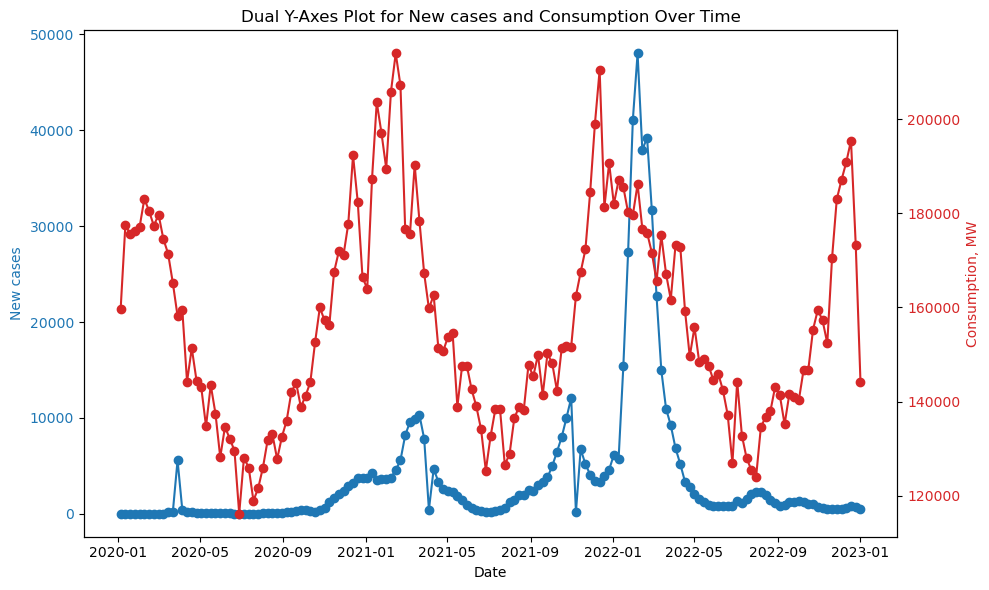

In [22]:
SimplePlotForCasesAndConsumption(merged_data_EE)

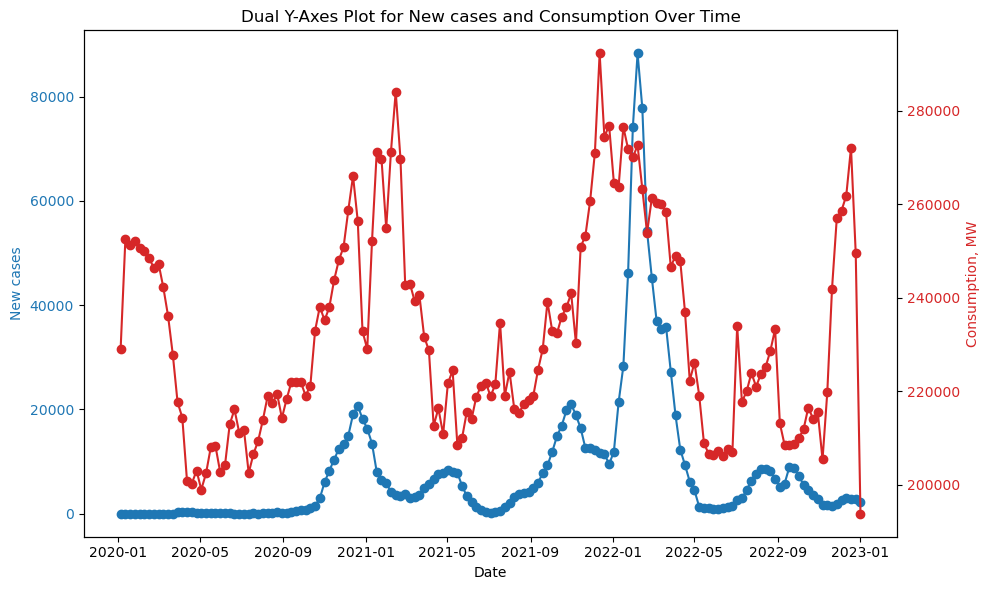

In [23]:
SimplePlotForCasesAndConsumption(merged_data_LT)

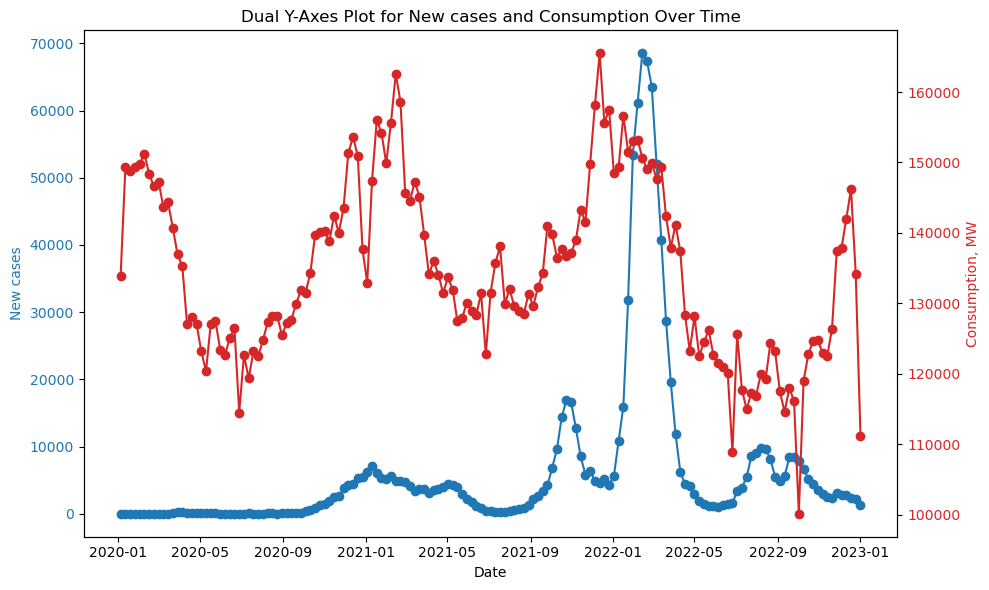

In [24]:
SimplePlotForCasesAndConsumption(merged_data_LV)

In [25]:
merged_data_EE.head()

index       Date  New_cases  Consumption
0      0 2020-01-05          0     159663.6
1      1 2020-01-12          0     177557.6
2      2 2020-01-19          0     175578.3
3      3 2020-01-26          0     176213.4
4      4 2020-02-02          0     177102.0

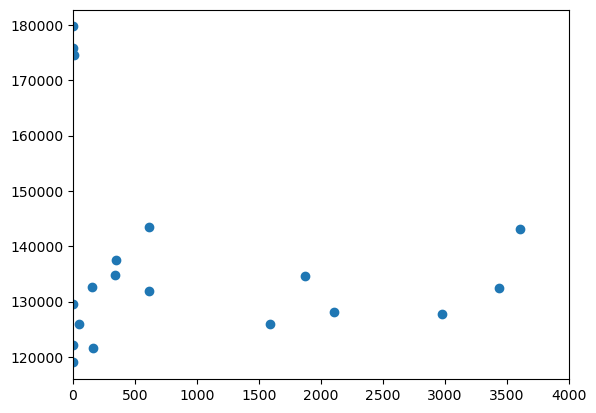

In [26]:
merged_data_EE2 = pd.DataFrame()
merged_data_EE2["New_cases"] = merged_data_EE["New_cases"]
merged_data_EE2["Avg_Consumption"] = merged_data_EE.groupby("New_cases")["Consumption"].mean()
plt.scatter(merged_data_EE2["New_cases"],merged_data_EE2["Avg_Consumption"])
plt.xlim(0,4000)

plt.show()

In [27]:
dc_EE.reset_index(inplace=True)
filter_datetime = pd.to_datetime('2020-01-01')
filtered_dc_EE = dc_EE[dc_EE['Date'] < filter_datetime]

In [28]:
#filtered_dc_EE['Date'] = pd.to_datetime(filtered_dc_EE['Date'])
#filtered_dc_EE.set_index('Date', inplace=True)
filtered_dc_EE.head()
filtered_dc_EE.index.freq = 'D'

In [29]:
filtered_dc_EE.head()

Date  Consumption
0 2018-01-01   20876.9217
1 2018-01-02   24311.7997
2 2018-01-03   25552.6593
3 2018-01-04   26062.5267
4 2018-01-05   25703.1026

In [30]:
dc_EE.reset_index(inplace=True)

In [31]:
dc_EE.head()
dc_EE['Date'] = pd.to_datetime(dc_EE['Date'])
dc_EE.set_index('Date', inplace=True)
dc_EE.index.freq = 'D'

In [32]:
#dc_EE.drop(["index"], axis=1, inplace=True)
#dc_EE.head()

In [33]:
#import pandas as pd
#from autots import AutoTS

#model = AutoTS(forecast_length=365, frequency='D', models_mode='univariate', no_negatives=True)

#model.fit(dc_EE)

#forecast = model.predict()

#print(forecast)

#model.plot()

In [34]:
#fig, ax = plt.subplots(figsize=(12, 6))

#dates = forecast.forecast.index.to_numpy()

#reshaped_dates = dates.reshape((len(dates), 1))
#reshaped_dates = dates.flatten()

#forecast_df = pd.DataFrame(forecast.forecast, columns=['Consumption'])

#ax.plot(reshaped_dates, forecast_df['Consumption'])

#confidence_intervals = pd.DataFrame(
#    {
#        'lower_conf': forecast.lower_forecast["Consumption"],
#        'upper_conf': forecast.upper_forecast["Consumption"],
#    },
#    index=dates,
#)

#ax.fill_between(
#    reshaped_dates, confidence_intervals.lower_conf, confidence_intervals.upper_conf, alpha=0.2, color='#CCCCCC'
#)

#ax.plot(dc_EE.index, dc_EE['Consumption'].rolling(window=3).mean())

#ax.set_xlabel('Date')
#ax.set_ylabel('Consumption (MW)')
#ax.set_title('Forecast of Energy Consumption')

#plt.show()

In [35]:
# Lockdown event dataset
import matplotlib.dates as mdates

#Estonia
lockdown_data_EE = {
    'Lockdown_Start': ['2020-03-13', '2020-12-28', '2021-03-11'],
    'Lockdown_End': ['2020-05-18', '2021-01-17', '2021-04-25']
}

lockdown_df_EE = pd.DataFrame(lockdown_data_EE)
lockdown_df_EE['Lockdown_Start'] = pd.to_datetime(lockdown_df_EE['Lockdown_Start'])
lockdown_df_EE['Lockdown_End'] = pd.to_datetime(lockdown_df_EE['Lockdown_End'])
lockdown_df_EE['Country'] = 'Estonia'
# Latvia
lockdown_data_LV = {
    'Lockdown_Start': ['2020-03-13', '2020-11-09', '2021-10-11'],
    'Lockdown_End': ['2020-06-09', '2021-04-06', '2022-01-11']
}

lockdown_df_LV = pd.DataFrame(lockdown_data_LV)
lockdown_df_LV['Lockdown_Start'] = pd.to_datetime(lockdown_df_LV['Lockdown_Start'])
lockdown_df_LV['Lockdown_End'] = pd.to_datetime(lockdown_df_LV['Lockdown_End'])
lockdown_df_LV['Country'] = 'Latvia'
#Lithuania 
lockdown_data_LT = {
    'Lockdown_Start': ['2020-03-12', '2020-10-26', '2020-11-04'],
    'Lockdown_End': ['2020-06-17', '2020-11-09','2021-07-01']
}

lockdown_df_LT = pd.DataFrame(lockdown_data_LT)
lockdown_df_LT['Lockdown_Start'] = pd.to_datetime(lockdown_df_LT['Lockdown_Start'])
lockdown_df_LT['Lockdown_End'] = pd.to_datetime(lockdown_df_LT['Lockdown_End'])
lockdown_df_LT['Country'] = 'Lithuania'

lockdown_df = pd.concat([lockdown_df_EE, lockdown_df_LV, lockdown_df_LT], ignore_index=True)


In [36]:
lockdown_df.head()

Lockdown_Start Lockdown_End  Country
0     2020-03-13   2020-05-18  Estonia
1     2020-12-28   2021-01-17  Estonia
2     2021-03-11   2021-04-25  Estonia
3     2020-03-13   2020-06-09   Latvia
4     2020-11-09   2021-04-06   Latvia

In [37]:
# Rolling means 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

def PlotRollingMeans(df, lockdown_df, country, window_size=4):
    sns.set_style("white")
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Calculate rolling mean for 'New_cases'
    df['New_cases_rolling'] = df['New_cases'].rolling(window=window_size).mean()

    # Plot rolling mean for 'New_cases'
    ax1.plot(df['Date'], df['New_cases_rolling'], label=f'New Cases (Rolling {window_size} weeks)', color='tab:blue')
    ax1.set_ylim(0,75000)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('New cases (Rolling Mean)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.legend(loc='lower right')
    # Create a second y-axis for 'Consumption'
    ax2 = ax1.twinx()

    # Calculate rolling mean for 'Consumption'
    df['Consumption_rolling'] = df['Consumption'].rolling(window=window_size).mean()

    # Plot rolling mean for 'Consumption'
    ax2.plot(df['Date'], df['Consumption_rolling'], label=f'Consumption (Rolling {window_size} weeks)', color='tab:red')
    
    ax2.set_ylabel('Consumption (Rolling Mean), MW', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    ax2.set_ylim(100000,280000)
    plt.legend(loc="upper right")
    
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    fig.autofmt_xdate(rotation=60)

    # Visualize Covid events using vertical lines
    for index, row in lockdown_df.iterrows():
        ax1.axvspan(row['Lockdown_Start'], row['Lockdown_End'], color='gray', alpha=0.2, label='Lockdown Period')

    plt.title(f'Rolling means ({window_size} weeks) Plot for New cases and Consumption Over Time in {country}')
    fig.tight_layout()
    
    
    ax1.text(0.25, 0.95, 'Countermeasure Period', verticalalignment='center', horizontalalignment='center', transform=ax1.transAxes,
            color='gray', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))
    
   

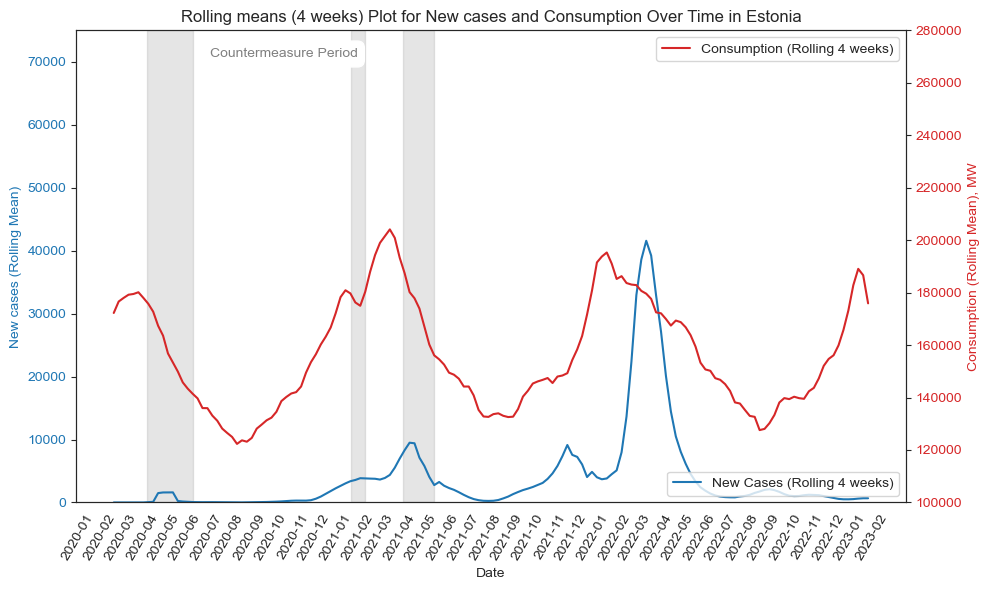

In [38]:
PlotRollingMeans(merged_data_EE, lockdown_df_EE, "Estonia")
plt.savefig("figure1.pdf")
plt.show()

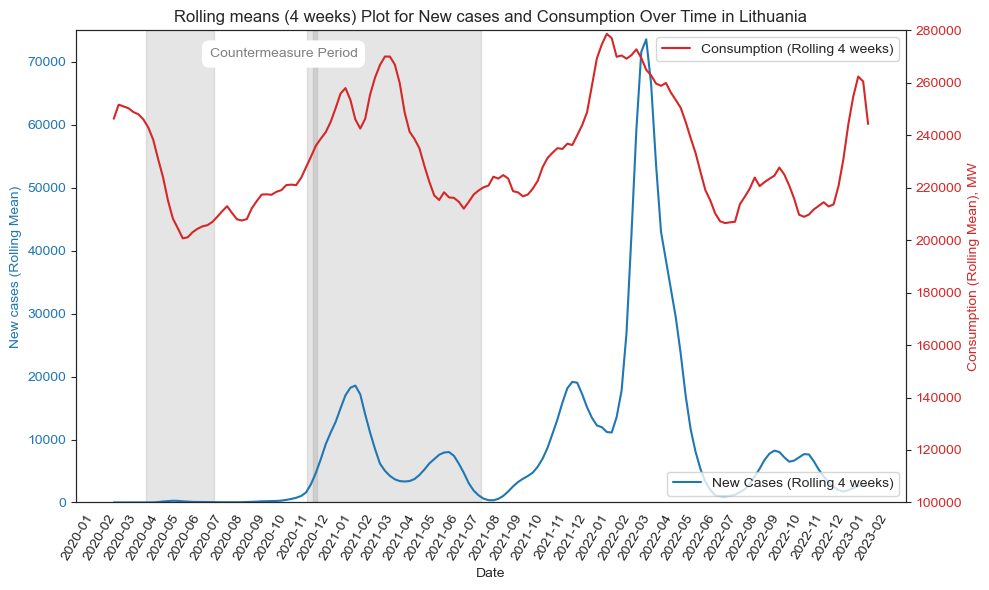

In [39]:
PlotRollingMeans(merged_data_LT, lockdown_df_LT, "Lithuania")
plt.savefig("figure2.pdf")
plt.show()

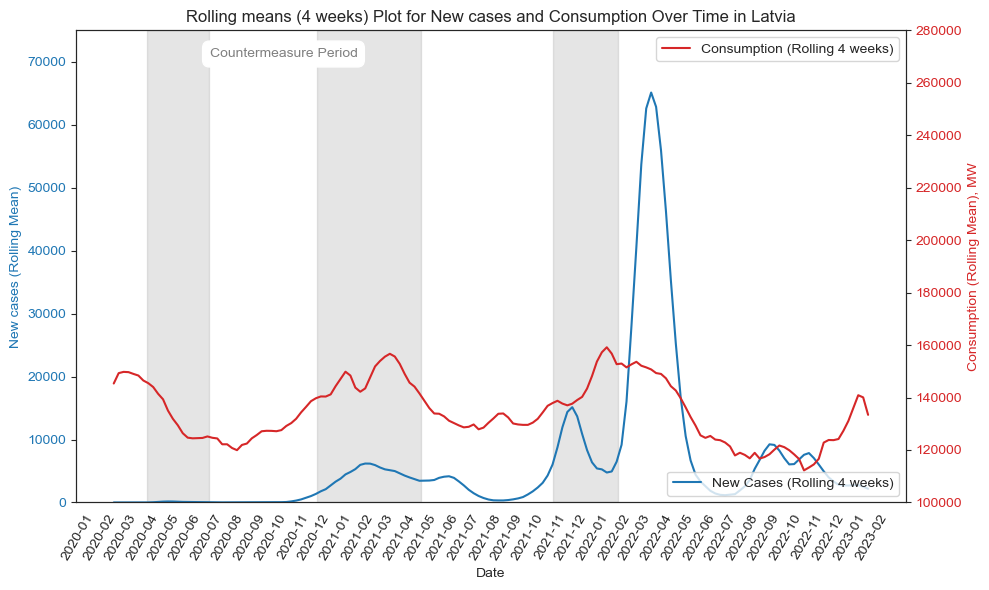

In [40]:
PlotRollingMeans(merged_data_LV, lockdown_df_LV, "Latvia")

plt.show()

The dates of largest peaks in new cases roughly match for all countries, therefore we define peak start and peak end to be 2022-02-01 and 2022-07-01

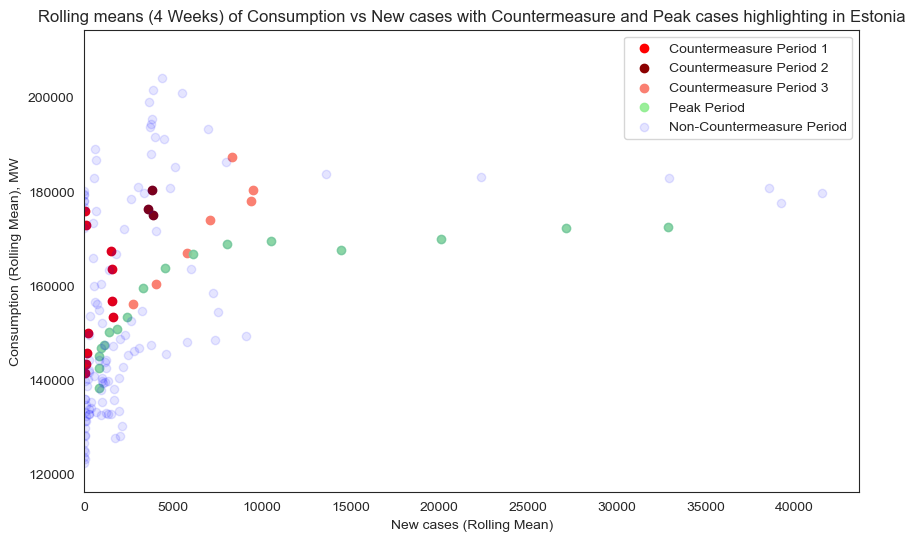

In [41]:
#correl plot for rolling means colored
def ScatterplotWithCountermeasure(df, country, window_size=4):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Calculate rolling mean for 'New_cases'
    df['New_cases_rolling'] = df['New_cases'].rolling(window=window_size).mean()

    # Calculate rolling mean for 'Consumption'
    df['Consumption_rolling'] = df['Consumption'].rolling(window=window_size).mean()

    # Scatterplot with countermeasure coloring
    k=0
    colors = ["red", "darkred", "salmon", "orange"]
    for index, row in lockdown_df[lockdown_df['Country'] == country].iterrows():
        countermeasure_mask = (df['Date'] >= row['Lockdown_Start']) & (df['Date'] <= row['Lockdown_End'])
        ax.scatter(
            df.loc[countermeasure_mask, 'New_cases_rolling'],
            df.loc[countermeasure_mask, 'Consumption_rolling'],
            label=f'Countermeasure Period {k+1}',
            color=colors[k],
            alpha=1
        )
        k +=1
    # Scatterplot with peak new cases coloring    
    peak_mask = (df['Date'] >= pd.to_datetime("2022-03-01")) & (df['Date'] <= pd.to_datetime("2022-07-01"))
    ax.scatter(
        df.loc[peak_mask, 'New_cases_rolling'],
        df.loc[peak_mask, 'Consumption_rolling'],
        label='Peak Period',
        color='lightgreen', 
        alpha=0.9
    )

    # Scatterplot for non-countermeasure period
    non_countermeasure_mask = ~countermeasure_mask
    ax.scatter(
        df.loc[non_countermeasure_mask, 'New_cases_rolling'],
        df.loc[non_countermeasure_mask, 'Consumption_rolling'],
        label='Non-Countermeasure Period',
        color='blue', 
        alpha=0.1
    )

    ax.set_xlabel('New cases (Rolling Mean)')
    ax.set_ylabel('Consumption (Rolling Mean), MW')
    plt.xlim((df["New_cases_rolling"].min()*0.95), (df["New_cases_rolling"].max()*1.05))
    plt.ylim((df["Consumption_rolling"].min()*0.95), (df["Consumption_rolling"].max()*1.05))
    # Customize the plot
    plt.title(f'Rolling means ({window_size} Weeks) of Consumption vs New cases with Countermeasure and Peak cases highlighting in {country}')
    plt.legend()
    


# Call the function with your DataFrame
ScatterplotWithCountermeasure(merged_data_EE, "Estonia")
plt.savefig("figure4.pdf")
plt.show()

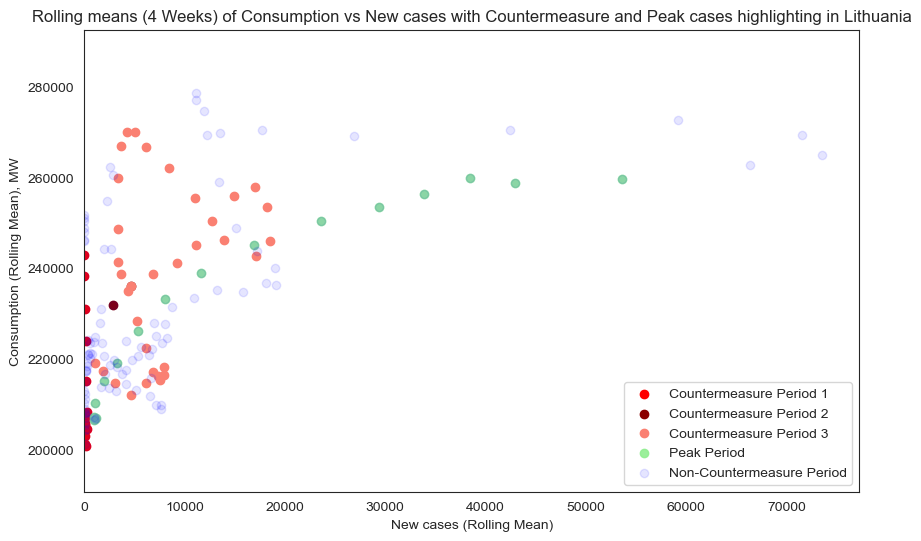

In [42]:
ScatterplotWithCountermeasure(merged_data_LT, "Lithuania")

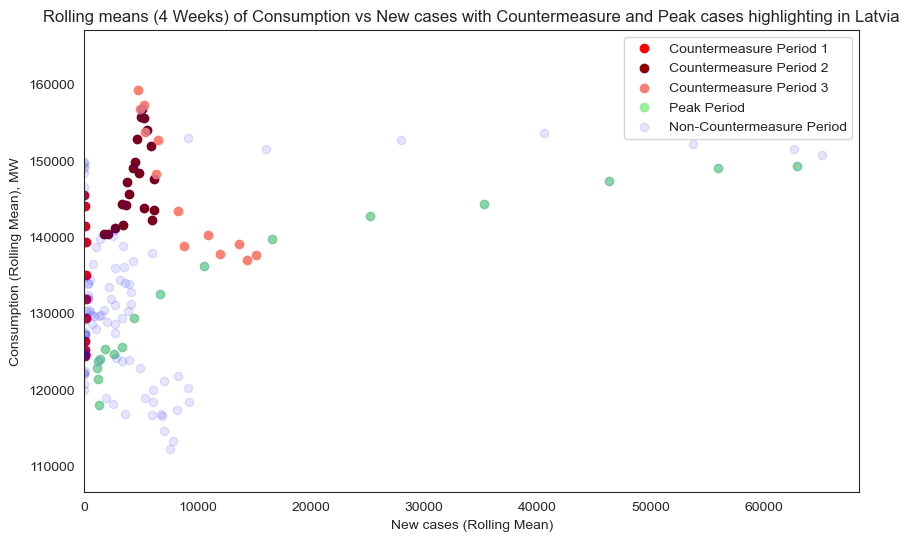

In [43]:
ScatterplotWithCountermeasure(merged_data_LV, "Latvia")

In [44]:
lockdown_df.head()

Lockdown_Start Lockdown_End  Country
0     2020-03-13   2020-05-18  Estonia
1     2020-12-28   2021-01-17  Estonia
2     2021-03-11   2021-04-25  Estonia
3     2020-03-13   2020-06-09   Latvia
4     2020-11-09   2021-04-06   Latvia

In [45]:
import pandas as pd
from scipy.stats import pearsonr

def format_p_value(p_value):
    return f'< 0.0001' if p_value < 0.0001 else f'{p_value:.4f}'

def calculate_correlations(df, country, window_size=4):
    # Calculate rolling mean for 'New_cases'
    df['New_cases_rolling'] = df['New_cases'].rolling(window=window_size).mean()

    # Calculate rolling mean for 'Consumption'
    df['Consumption_rolling'] = df['Consumption'].rolling(window=window_size).mean()

    # Drop rows with NaN values after calculating rolling means
    df = df.dropna()

    # Initialize dictionaries to store correlations
    correlations = {
        'Overall': {'Correlation': None, 'P-Value': None},
        'Countermeasure': {},
        'Peak': {'Correlation': None, 'P-Value': None},
        'All Countermeasure Periods': {'Correlation': None, 'P-Value': None},
        'All Periods': {'Correlation': None, 'P-Value': None}
    }

    # Calculate overall correlation and p-value
    overall_corr_result = pearsonr(df['New_cases_rolling'], df['Consumption_rolling'])
    correlations['Overall']['Correlation'] = overall_corr_result[0] if not np.isnan(overall_corr_result[0]) else None
    correlations['Overall']['P-Value'] = overall_corr_result[1] if not np.isnan(overall_corr_result[1]) else None

    # Calculate peak correlation and p-value
    peak_mask = (df['Date'] >= pd.to_datetime("2022-03-01")) & (df['Date'] <= pd.to_datetime("2022-07-01"))
    peak_corr_result = pearsonr(df.loc[peak_mask, 'New_cases_rolling'], df.loc[peak_mask, 'Consumption_rolling'])
    correlations['Peak']['Correlation'] = peak_corr_result[0] if not np.isnan(peak_corr_result[0]) else None
    correlations['Peak']['P-Value'] = peak_corr_result[1] if not np.isnan(peak_corr_result[1]) else None

    # Calculate countermeasure_mask
    k = 0
    all_countermeasure_mask = pd.Series(False, index=df.index)
    for index, row in lockdown_df[lockdown_df['Country'] == country].iterrows():
        countermeasure_mask = (df['Date'] >= row['Lockdown_Start']) & (df['Date'] <= row['Lockdown_End'])

        # Calculate correlations for each countermeasure mask individually
        countermeasure_corr_result = pearsonr(
            df.loc[countermeasure_mask, 'New_cases_rolling'],
            df.loc[countermeasure_mask, 'Consumption_rolling']
        )
        correlations['Countermeasure'][f'Countermeasure Period {k+1}'] = {
            'Correlation': countermeasure_corr_result[0] if not np.isnan(countermeasure_corr_result[0]) else None,
            'P-Value': countermeasure_corr_result[1] if not np.isnan(countermeasure_corr_result[1]) else None
        }

        # Update all_countermeasure_mask
        all_countermeasure_mask |= countermeasure_mask
        k += 1

    # Calculate correlations for all countermeasure periods together
    all_countermeasure_corr_result = pearsonr(
        df.loc[all_countermeasure_mask, 'New_cases_rolling'],
        df.loc[all_countermeasure_mask, 'Consumption_rolling']
    )
    correlations['All Countermeasure Periods']['Correlation'] = all_countermeasure_corr_result[0] if not np.isnan(all_countermeasure_corr_result[0]) else None
    correlations['All Countermeasure Periods']['P-Value'] = all_countermeasure_corr_result[1] if not np.isnan(all_countermeasure_corr_result[1]) else None

    # Calculate correlations for all periods (countermeasure and peak) together
    all_periods_mask = all_countermeasure_mask | peak_mask
    all_periods_corr_result = pearsonr(
        df.loc[all_periods_mask, 'New_cases_rolling'],
        df.loc[all_periods_mask, 'Consumption_rolling']
    )
    correlations['All Periods']['Correlation'] = all_periods_corr_result[0] if not np.isnan(all_periods_corr_result[0]) else None
    correlations['All Periods']['P-Value'] = all_periods_corr_result[1] if not np.isnan(all_periods_corr_result[1]) else None

    results = (
        f'Overall Correlation: {correlations["Overall"]["Correlation"]:.4f} (P-Value: {format_p_value(correlations["Overall"]["P-Value"])})\n'
        f'Peak Correlation: {correlations["Peak"]["Correlation"]:.4f} (P-Value: {format_p_value(correlations["Peak"]["P-Value"])})\n'
        'Countermeasure Correlations:\n'
    )

    for key, value in correlations['Countermeasure'].items():
        results += f'{key}: {value["Correlation"]:.4f} (P-Value: {format_p_value(value["P-Value"])})\n'

    results += f'All Countermeasure Periods: {correlations["All Countermeasure Periods"]["Correlation"]:.4f} (P-Value: {format_p_value(correlations["All Countermeasure Periods"]["P-Value"])})\n'

    results += f'All Periods: {correlations["All Periods"]["Correlation"]:.4f} (P-Value: {format_p_value(correlations["All Periods"]["P-Value"])})\n'

    return results

In [46]:
correlation_results = calculate_correlations(merged_data_EE, "Estonia")
print(correlation_results)


Overall Correlation: 0.3824 (P-Value: < 0.0001)
Peak Correlation: 0.7785 (P-Value: 0.0002)
Countermeasure Correlations:
Countermeasure Period 1: 0.1985 (P-Value: 0.5826)
Countermeasure Period 2: 0.1647 (P-Value: 0.8947)
Countermeasure Period 3: 0.9198 (P-Value: 0.0033)
All Countermeasure Periods: 0.6791 (P-Value: 0.0010)
All Periods: 0.4789 (P-Value: 0.0027)



In [47]:
correlation_results = calculate_correlations(merged_data_LT, "Lithuania")
print(correlation_results)


Overall Correlation: 0.5555 (P-Value: < 0.0001)
Peak Correlation: 0.9210 (P-Value: < 0.0001)
Countermeasure Correlations:
Countermeasure Period 1: -0.4709 (P-Value: 0.0893)
Countermeasure Period 2: 1.0000 (P-Value: 1.0000)
Countermeasure Period 3: 0.2797 (P-Value: 0.1091)
All Countermeasure Periods: 0.5218 (P-Value: 0.0001)
All Periods: 0.5718 (P-Value: < 0.0001)



In [48]:
correlation_results = calculate_correlations(merged_data_LV, "Latvia")
print(correlation_results)


Overall Correlation: 0.3555 (P-Value: < 0.0001)
Peak Correlation: 0.9205 (P-Value: < 0.0001)
Countermeasure Correlations:
Countermeasure Period 1: -0.0347 (P-Value: 0.9103)
Countermeasure Period 2: 0.5338 (P-Value: 0.0127)
Countermeasure Period 3: -0.9025 (P-Value: < 0.0001)
All Countermeasure Periods: 0.3009 (P-Value: 0.0398)
All Periods: 0.2772 (P-Value: 0.0266)



In [49]:
daily_sum_EE = dc_EE.resample('D').sum()
daily_sum_EE.reset_index(inplace=True)

daily_sum_LT = dc_LT.resample('D').sum()
daily_sum_LT.reset_index(inplace=True)
#weekly_mean_LT.head()

daily_sum_LV = dc_LV.resample('D').sum()
daily_sum_LV.reset_index(inplace=True)

merged_data = pd.merge(daily_sum_EE, daily_sum_LT, on='Date', suffixes=('_EE', '_LT'))
merged_data = pd.merge(merged_data, daily_sum_LV, on='Date', suffixes=('_EE', '_LT', '_LV'))
merged_data.rename(columns={'Consumption': 'Consumption_LV'}, inplace=True)
merged_data.drop("index", inplace=True, axis=1)
merged_data.head()

Date  Consumption_EE  Consumption_LT  Consumption_LV
0 2018-01-01      20876.9217        27960.57         17083.0
1 2018-01-02      24311.7997        33752.75         20449.0
2 2018-01-03      25552.6593        35616.33         21943.0
3 2018-01-04      26062.5267        36008.77         22371.0
4 2018-01-05      25703.1026        35855.01         22270.0

In [50]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
filtered_data_2019 = merged_data[(merged_data['Date'] >= '2019-03-11') & (merged_data['Date'] <= '2019-06-16')]
filtered_data_2020 = merged_data[(merged_data['Date'] >= '2020-03-11') & (merged_data['Date'] <= '2020-06-16')]

filtered_data_2019['Date'] = filtered_data_2019['Date'].dt.strftime('%m-%d')
filtered_data_2019.reset_index(drop=True, inplace=True)

filtered_data_2020['Date'] = filtered_data_2020['Date'].dt.strftime('%m-%d')
filtered_data_2020.reset_index(drop=True, inplace=True)
filtered_data_2019.head()

/var/folders/f4/x_v40yg53n1_yswsy8tvq36h0000gn/T/ipykernel_44138/1394210119.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2019['Date'] = filtered_data_2019['Date'].dt.strftime('%m-%d')
/var/folders/f4/x_v40yg53n1_yswsy8tvq36h0000gn/T/ipykernel_44138/1394210119.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2020['Date'] = filtered_data_2020['Date'].dt.strftime('%m-%d')


Date  Consumption_EE  Consumption_LT  Consumption_LV
0  03-11      26544.8474        31465.49         21695.0
1  03-12      27303.8651        36163.90         22252.0
2  03-13      26332.4654        36207.02         21930.0
3  03-14      26063.6935        36267.32         21844.0
4  03-15      25574.9600        35772.59         21606.0

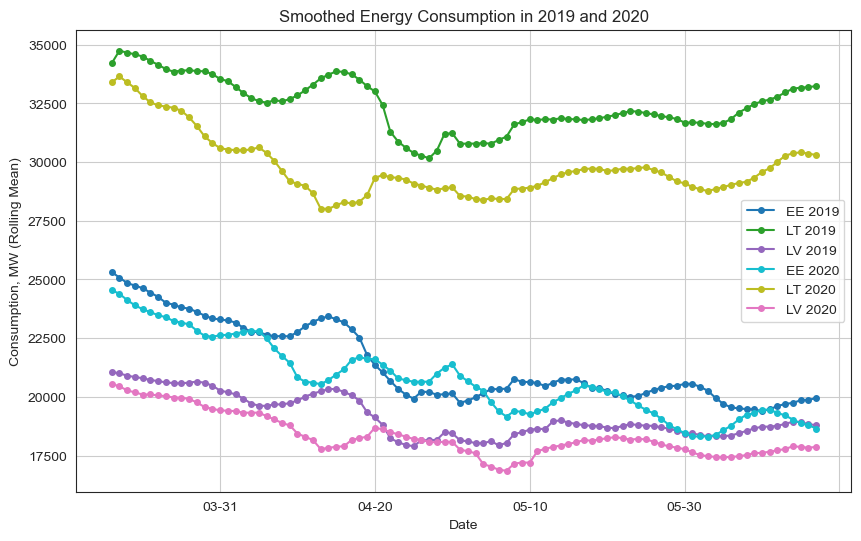

In [51]:
# 1st option with rolling means
filtered_data_2019 = filtered_data_2019.set_index('Date')
filtered_data_2020 = filtered_data_2020.set_index('Date')

window_size = 7 
filtered_data_2019_smoothed = filtered_data_2019.rolling(window=window_size).mean()
filtered_data_2020_smoothed = filtered_data_2020.rolling(window=window_size).mean()

# Now 'Date' is the index
ax = filtered_data_2019_smoothed.plot(y=['Consumption_EE', 'Consumption_LT', 'Consumption_LV'],
                                      marker='o', linestyle='-', markersize=4, figsize=(10, 6),
                                      color=['tab:blue', 'tab:green', 'tab:purple'])
filtered_data_2020_smoothed.plot(y=['Consumption_EE', 'Consumption_LT', 'Consumption_LV'],
                                  marker='o', linestyle='-', markersize=4, ax=ax,
                                  color=['tab:cyan', 'tab:olive', 'tab:pink'])

plt.title('Smoothed Energy Consumption in 2019 and 2020')
plt.xlabel('Date')
plt.ylabel('Consumption, MW (Rolling Mean)')
plt.grid(True)
plt.legend(['EE 2019', 'LT 2019', 'LV 2019', 'EE 2020', 'LT 2020', 'LV 2020'])
plt.show()

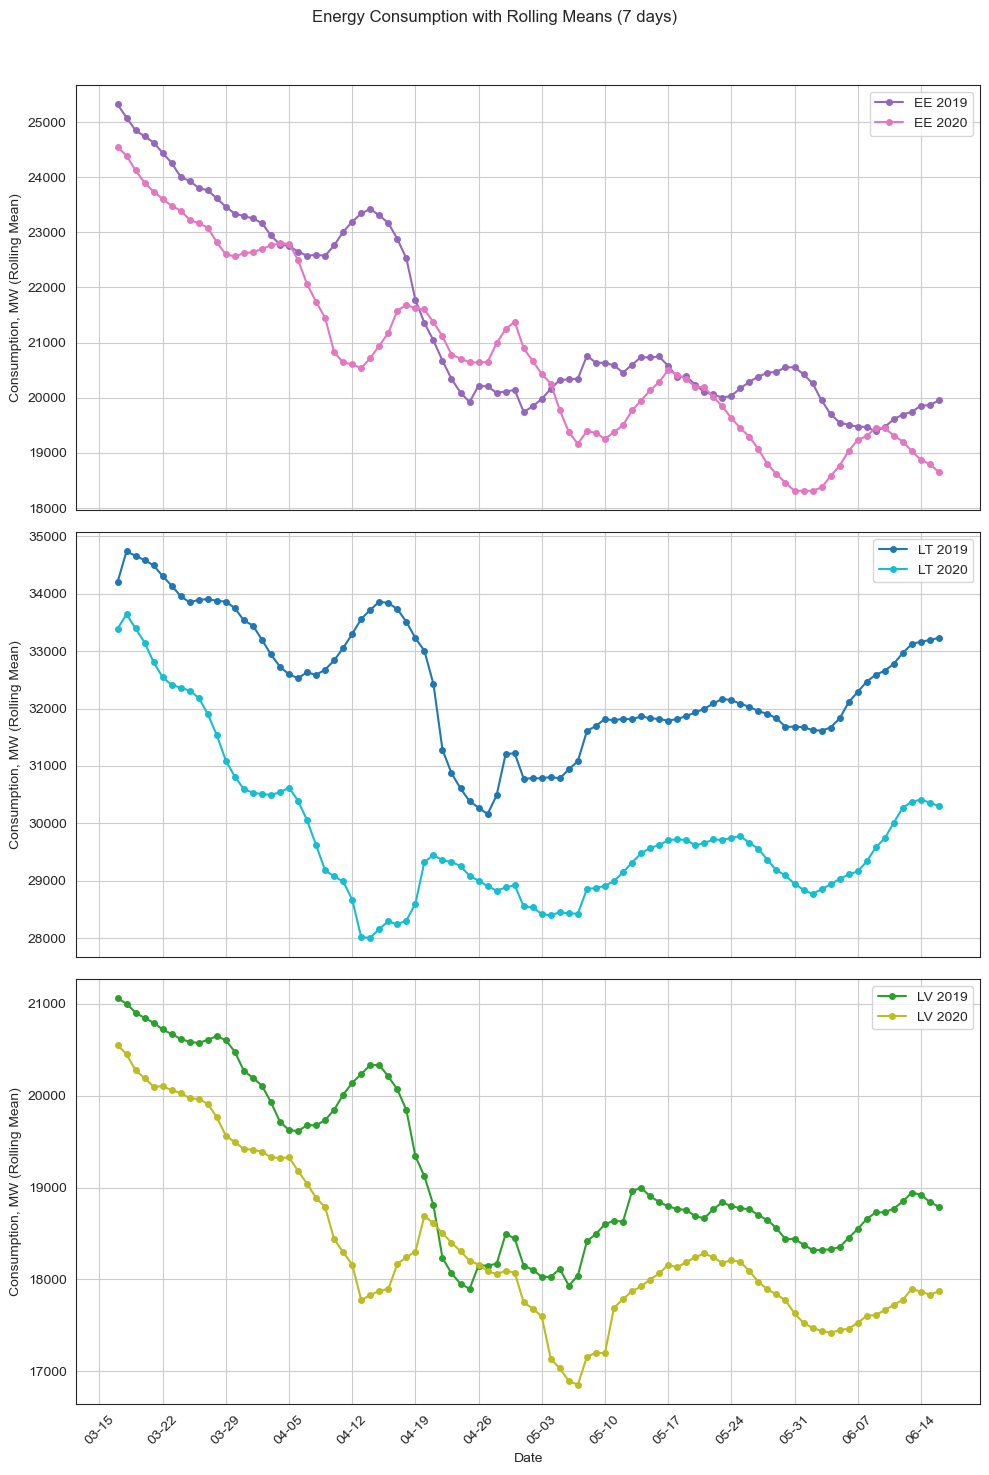

In [52]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#2nd option with rolling means

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15), sharex=True)

# Apply rolling mean to smooth out the data
window_size = 7 
filtered_data_2019_smoothed = filtered_data_2019.rolling(window=window_size).mean()
filtered_data_2020_smoothed = filtered_data_2020.rolling(window=window_size).mean()

# Plot for EE 2019
axes[0].plot(filtered_data_2019_smoothed['Consumption_EE'], marker='o', linestyle='-', markersize=4, color='tab:purple', label='EE 2019')
axes[0].plot(filtered_data_2020_smoothed['Consumption_EE'], marker='o', linestyle='-', markersize=4, color='tab:pink', label='EE 2020')
axes[0].set_ylabel('Consumption, MW (Rolling Mean)')
axes[0].grid(True)
axes[0].legend()

# Plot for LT 2019
axes[1].plot(filtered_data_2019_smoothed['Consumption_LT'], marker='o', linestyle='-', markersize=4, color='tab:blue', label='LT 2019')
axes[1].plot(filtered_data_2020_smoothed['Consumption_LT'], marker='o', linestyle='-', markersize=4, color='tab:cyan', label='LT 2020')
axes[1].set_ylabel('Consumption, MW (Rolling Mean)')
axes[1].grid(True)
axes[1].legend()

# Plot for LV 2019
axes[2].plot(filtered_data_2019_smoothed['Consumption_LV'], marker='o', linestyle='-', markersize=4, color='tab:green', label='LV 2019')
axes[2].plot(filtered_data_2020_smoothed['Consumption_LV'], marker='o', linestyle='-', markersize=4, color='tab:olive', label='LV 2020')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Consumption, MW (Rolling Mean)')
axes[2].grid(True)
axes[2].legend()

# Set common title and x-axis label
plt.suptitle(f'Energy Consumption with Rolling Means ({window_size} days)')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("figure5.pdf")
plt.show()

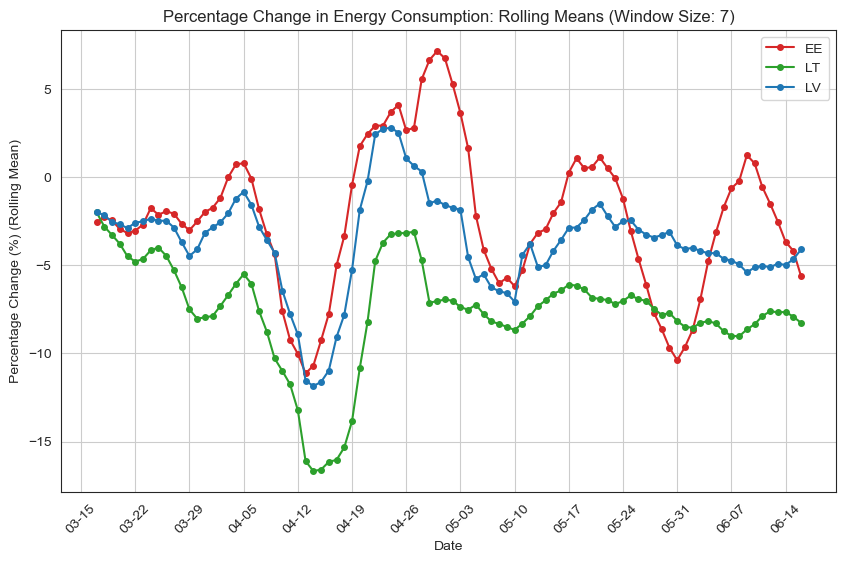

In [53]:
plt.figure(figsize=(10, 6))
percentage_change_EE = ((filtered_data_2020['Consumption_EE'] - filtered_data_2019['Consumption_EE']) / filtered_data_2019['Consumption_EE']) * 100
percentage_change_LT = ((filtered_data_2020['Consumption_LT'] - filtered_data_2019['Consumption_LT']) / filtered_data_2019['Consumption_LT']) * 100
percentage_change_LV = ((filtered_data_2020['Consumption_LV'] - filtered_data_2019['Consumption_LV']) / filtered_data_2019['Consumption_LV']) * 100
window_size = 7
percentage_change_EE_smoothed = percentage_change_EE.rolling(window=window_size).mean()
percentage_change_LT_smoothed = percentage_change_LT.rolling(window=window_size).mean()
percentage_change_LV_smoothed = percentage_change_LV.rolling(window=window_size).mean()

# Plot smoothed percentage change for each country
plt.plot(percentage_change_EE_smoothed, marker='o', linestyle='-', markersize=4, color='tab:red', label='EE')
plt.plot(percentage_change_LT_smoothed, marker='o', linestyle='-', markersize=4, color='tab:green', label='LT')
plt.plot(percentage_change_LV_smoothed, marker='o', linestyle='-', markersize=4, color='tab:blue', label='LV')

plt.title(f'Percentage Change in Energy Consumption: Rolling Means (Window Size: {window_size})')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%) (Rolling Mean)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.show()

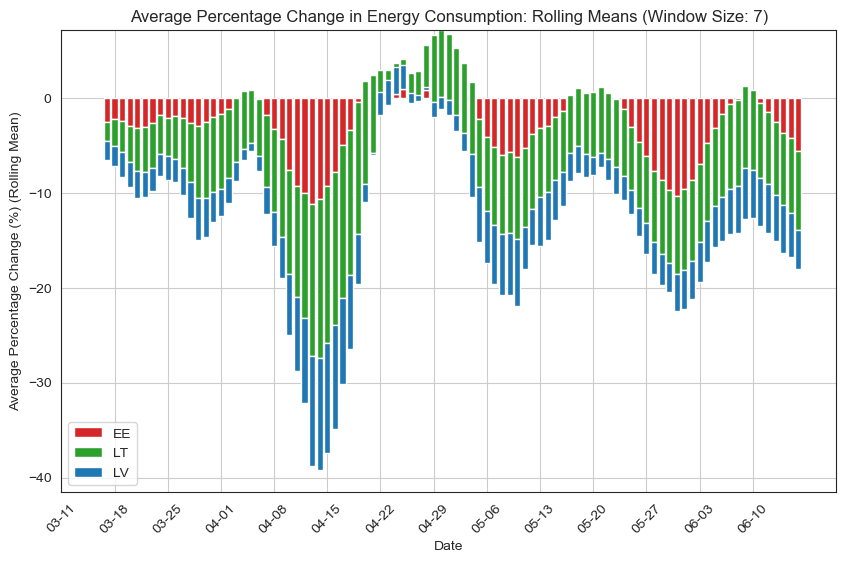

In [54]:
# Assuming 'Date' is the index
percentage_change_EE = ((filtered_data_2020['Consumption_EE'] - filtered_data_2019['Consumption_EE']) / filtered_data_2019['Consumption_EE']) * 100
percentage_change_LT = ((filtered_data_2020['Consumption_LT'] - filtered_data_2019['Consumption_LT']) / filtered_data_2019['Consumption_LT']) * 100
percentage_change_LV = ((filtered_data_2020['Consumption_LV'] - filtered_data_2019['Consumption_LV']) / filtered_data_2019['Consumption_LV']) * 100

# Calculate rolling mean
window_size = 7
percentage_change_EE_smoothed = percentage_change_EE.rolling(window=window_size).mean()
percentage_change_LT_smoothed = percentage_change_LT.rolling(window=window_size).mean()
percentage_change_LV_smoothed = percentage_change_LV.rolling(window=window_size).mean()

# Plot bar chart for the smoothed percentage change
plt.figure(figsize=(10, 6))
plt.bar(filtered_data_2019.index, percentage_change_EE_smoothed, color='tab:red', label='EE')
plt.bar(filtered_data_2019.index, percentage_change_LT_smoothed, color='tab:green', label='LT', bottom=percentage_change_EE_smoothed)
plt.bar(filtered_data_2019.index, percentage_change_LV_smoothed, color='tab:blue', label='LV',
        bottom=percentage_change_EE_smoothed + percentage_change_LT_smoothed)

plt.title(f'Average Percentage Change in Energy Consumption: Rolling Means (Window Size: {window_size})')
plt.xlabel('Date')
plt.ylabel('Average Percentage Change (%) (Rolling Mean)')
plt.grid(True)
plt.legend()
plt.xticks(filtered_data_2019.index[::7], rotation=45)
plt.show()

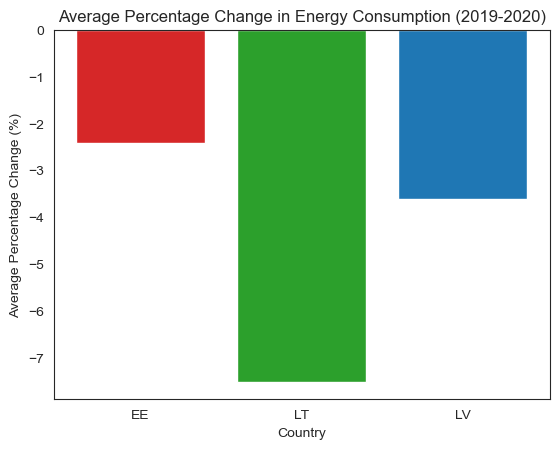

In [55]:
average_change_EE = ((filtered_data_2020['Consumption_EE'] - filtered_data_2019['Consumption_EE']) / filtered_data_2019['Consumption_EE']).mean() * 100
average_change_LT = ((filtered_data_2020['Consumption_LT'] - filtered_data_2019['Consumption_LT']) / filtered_data_2019['Consumption_LT']).mean() * 100
average_change_LV = ((filtered_data_2020['Consumption_LV'] - filtered_data_2019['Consumption_LV']) / filtered_data_2019['Consumption_LV']).mean() * 100

# Plot bar chart for the average percentage change
plt.bar(['EE', 'LT', 'LV'], [average_change_EE, average_change_LT, average_change_LV], color=['tab:red', 'tab:green', 'tab:blue'])
plt.title('Average Percentage Change in Energy Consumption (2019-2020)')
plt.xlabel('Country')
plt.ylabel('Average Percentage Change (%)')
plt.show()

In [56]:
#weekly data from daily resampled
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
fd_2019 = merged_data[(merged_data['Date'] >= '2019-03-03') & (merged_data['Date'] <= '2019-06-09')]
fd_2020 = merged_data[(merged_data['Date'] >= '2020-03-03') & (merged_data['Date'] <= '2020-06-09')]

fd_2019['Date'] = pd.to_datetime(fd_2019['Date'])
fd_2019.set_index('Date', inplace=True)
weekly_mean_fd_2019 = fd_2019.resample('W').mean()
weekly_mean_fd_2019.reset_index(inplace=True)

# Weekly resample for 2020
fd_2020['Date'] = pd.to_datetime(fd_2020['Date'])
fd_2020.set_index('Date', inplace=True)
# Use 'left' to include the left bin edge (start of the week)
weekly_mean_fd_2020 = fd_2020.resample('W').mean()
weekly_mean_fd_2020.reset_index(inplace=True)

# Display the first few rows
weekly_mean_fd_2020.head()

/var/folders/f4/x_v40yg53n1_yswsy8tvq36h0000gn/T/ipykernel_44138/4167766751.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd_2019['Date'] = pd.to_datetime(fd_2019['Date'])
/var/folders/f4/x_v40yg53n1_yswsy8tvq36h0000gn/T/ipykernel_44138/4167766751.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd_2020['Date'] = pd.to_datetime(fd_2020['Date'])


Date  Consumption_EE  Consumption_LT  Consumption_LV
0 2020-03-08    24846.033333    34457.141667    20452.000000
1 2020-03-15    24493.685714    33729.620000    20622.285714
2 2020-03-22    23607.342857    32545.391429    20102.000000
3 2020-03-29    22599.049571    31093.591429    19565.000000
4 2020-04-05    22791.514286    30621.768571    19328.000000

In [57]:
#date column dropped
weekly_mean_2019 = weekly_mean_fd_2019.drop('Date', axis=1).reset_index(drop=True)
weekly_mean_2020 = weekly_mean_fd_2020.drop('Date', axis=1).reset_index(drop=True)

weekly_mean_2019.head()

Consumption_EE  Consumption_LT  Consumption_LV
0    23655.333400    32117.250000    19571.000000
1    25664.267086    34600.927143    21223.285714
2    25319.377586    34201.300000    21060.857143
3    24005.249029    33960.092857    20617.000000
4    23294.859000    33535.668571    20270.428571

In [58]:
weekly_mean_EE = dc_EE.resample('W').mean()
weekly_mean_EE.reset_index(inplace=True)

weekly_mean_LT = dc_LT.resample('W').mean()
weekly_mean_LT.reset_index(inplace=True)
#weekly_mean_LT.head()

weekly_mean_LV = dc_LV.resample('W').mean()
weekly_mean_LV.reset_index(inplace=True)

merged_data = pd.merge(weekly_mean_EE, weekly_mean_LT, on='Date', suffixes=('_EE', '_LT'))
merged_data = pd.merge(merged_data, weekly_mean_LV, on='Date', suffixes=('_EE', '_LT', '_LV'))
merged_data.rename(columns={'Consumption': 'Consumption_LV'}, inplace=True)
merged_data.head()

Date  index  Consumption_EE  Consumption_LT  Consumption_LV
0 2018-01-07    3.0    24183.798300    33299.730000    20452.428571
1 2018-01-14   10.0    27245.896029    36622.120000    22426.285714
2 2018-01-21   17.0    28819.668943    37434.952857    23309.571429
3 2018-01-28   24.0    27010.040600    37275.424286    22939.000000
4 2018-02-04   31.0    26691.131786    35875.644286    18935.000000

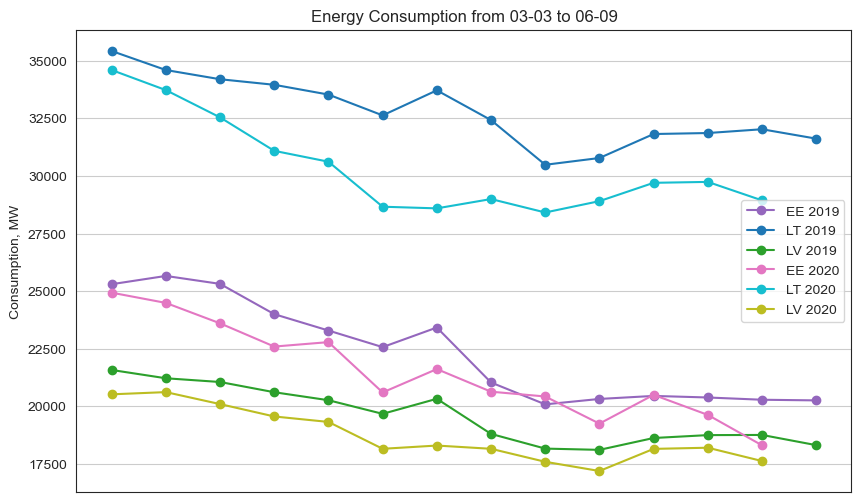

In [59]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
filtered_data_2019 = merged_data[(merged_data['Date'] >= '2019-03-03') & (merged_data['Date'] <= '2019-06-03')]
filtered_data_2020 = merged_data[(merged_data['Date'] >= '2020-03-03') & (merged_data['Date'] <= '2020-06-03')]

fd_2019 = filtered_data_2019[["Consumption_EE", "Consumption_LT", "Consumption_LV"]]
fd_2019.reset_index(drop=True, inplace=True)

fd_2020 = filtered_data_2020[["Consumption_EE", "Consumption_LT", "Consumption_LV"]]
fd_2020.reset_index(drop=True, inplace=True)
fd_2020.head()

plt.figure(figsize=(10, 6))
plt.plot(fd_2019['Consumption_EE'], marker='o', linestyle='-', color='tab:purple', label='EE 2019')
plt.plot(fd_2019['Consumption_LT'], marker='o', linestyle='-', color='tab:blue', label='LT 2019')
plt.plot(fd_2019['Consumption_LV'], marker='o', linestyle='-', color='tab:green', label='LV 2019')
plt.plot(fd_2020['Consumption_EE'], marker='o', linestyle='-', color='tab:pink', label='EE 2020')
plt.plot(fd_2020['Consumption_LT'], marker='o', linestyle='-', color='tab:cyan', label='LT 2020')
plt.plot(fd_2020['Consumption_LV'], marker='o', linestyle='-', color='tab:olive', label='LV 2020')

plt.xticks([])
plt.title('Energy Consumption from 03-03 to 06-09')
plt.ylabel('Consumption, MW')
plt.grid(True)
plt.legend()
plt.show()

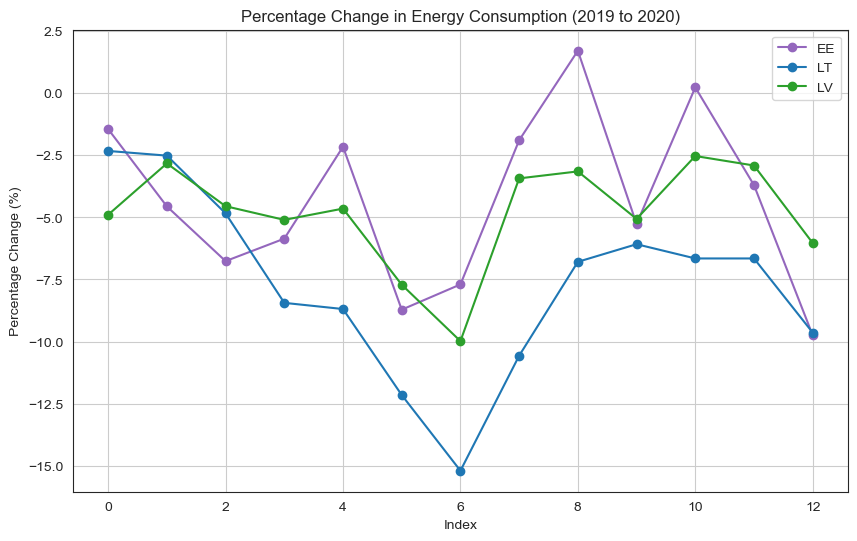

In [60]:
#Plot as a difference in percentages
percentage_change_EE = ((fd_2020['Consumption_EE'] - fd_2019['Consumption_EE']) / fd_2019['Consumption_EE']) * 100
percentage_change_LT = ((fd_2020['Consumption_LT'] - fd_2019['Consumption_LT']) / fd_2019['Consumption_LT']) * 100
percentage_change_LV = ((fd_2020['Consumption_LV'] - fd_2019['Consumption_LV']) / fd_2019['Consumption_LV']) * 100

plt.figure(figsize=(10, 6))

# Plot percentage change lines for each country
plt.plot(percentage_change_EE, marker='o', linestyle='-', color='tab:purple', label='EE')
plt.plot(percentage_change_LT, marker='o', linestyle='-', color='tab:blue', label='LT')
plt.plot(percentage_change_LV, marker='o', linestyle='-', color='tab:green', label='LV')

plt.title('Percentage Change in Energy Consumption (2019 to 2020)')
plt.xlabel('Index')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.legend()
plt.show()

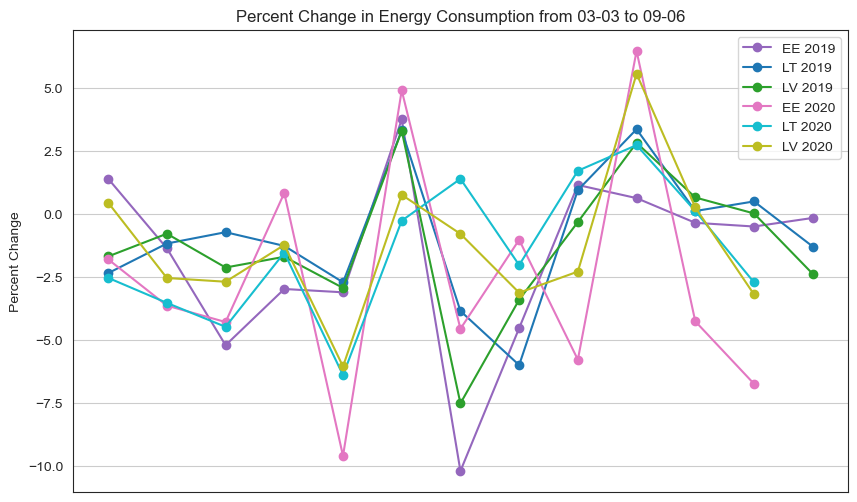

In [61]:
#Plot as a difference in percentages
# Calculate percent change for 2019 and 2020
percent_change_2019 = fd_2019.pct_change() * 100
percent_change_2020 = fd_2020.pct_change() * 100

plt.figure(figsize=(10, 6))

# Plot percent change for 2019
plt.plot(percent_change_2019['Consumption_EE'], marker='o', linestyle='-', color='tab:purple', label='EE 2019')
plt.plot(percent_change_2019['Consumption_LT'], marker='o', linestyle='-', color='tab:blue', label='LT 2019')
plt.plot(percent_change_2019['Consumption_LV'], marker='o', linestyle='-', color='tab:green', label='LV 2019')

# Plot percent change for 2020
plt.plot(percent_change_2020['Consumption_EE'], marker='o', linestyle='-', color='tab:pink', label='EE 2020')
plt.plot(percent_change_2020['Consumption_LT'], marker='o', linestyle='-', color='tab:cyan', label='LT 2020')
plt.plot(percent_change_2020['Consumption_LV'], marker='o', linestyle='-', color='tab:olive', label='LV 2020')

plt.xticks([])
plt.title('Percent Change in Energy Consumption from 03-03 to 09-06')
plt.ylabel('Percent Change')
plt.grid(True)
plt.legend()
plt.show()

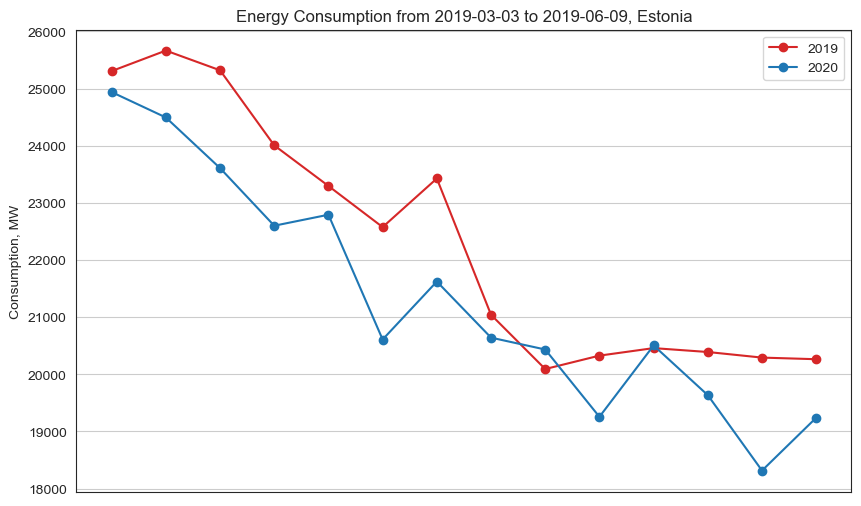

In [62]:
weekly_mean_EE['Date'] = pd.to_datetime(weekly_mean_EE['Date'])

# Filter data for the specified date ranges
filtered_data_2019 = weekly_mean_EE[(weekly_mean_EE['Date'] >= '2019-03-03') & (weekly_mean_EE['Date'] <= '2019-06-03')]
filtered_data_2020 = weekly_mean_EE[(weekly_mean_EE['Date'] >= '2020-03-03') & (weekly_mean_EE['Date'] <= '2020-06-09')]

#no dates
fd_2020= filtered_data_2020["Consumption"]
fd_2020 = pd.DataFrame(fd_2020)
fd_2020.reset_index(inplace=True)
fd_2020.drop("index", axis=1, inplace=True)

fd_2019= filtered_data_2019["Consumption"]
fd_2019 = pd.DataFrame(fd_2019)
fd_2019.reset_index(inplace=True)
fd_2019.drop("index", axis=1, inplace=True)

# Plot energy consumption for 2019 and 2020
plt.figure(figsize=(10, 6))
plt.plot(fd_2019['Consumption'], marker='o', linestyle='-', color='tab:red', label='2019')
plt.plot(fd_2020['Consumption'], marker='o', linestyle='-', color='tab:blue', label='2020')

plt.xticks([])
plt.title('Energy Consumption from 2019-03-03 to 2019-06-09, Estonia')
plt.ylabel('Consumption, MW')
plt.grid(True)
plt.legend()
plt.show()


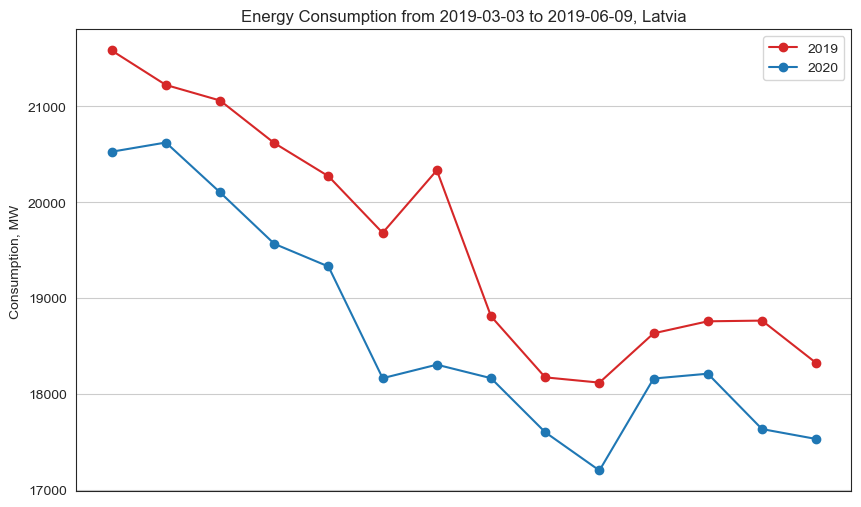

In [63]:
weekly_mean_LV['Date'] = pd.to_datetime(weekly_mean_LV['Date'])

# Filter data for the specified date ranges
filtered_data_2019 = weekly_mean_LV[(weekly_mean_LV['Date'] >= '2019-03-03') & (weekly_mean_LV['Date'] <= '2019-06-03')]
filtered_data_2020 = weekly_mean_LV[(weekly_mean_LV['Date'] >= '2020-03-03') & (weekly_mean_LV['Date'] <= '2020-06-09')]

#no dates
fd_2020= filtered_data_2020["Consumption"]
fd_2020 = pd.DataFrame(fd_2020)
fd_2020.reset_index(inplace=True)
fd_2020.drop("index", axis=1, inplace=True)

fd_2019= filtered_data_2019["Consumption"]
fd_2019 = pd.DataFrame(fd_2019)
fd_2019.reset_index(inplace=True)
fd_2019.drop("index", axis=1, inplace=True)

# Plot energy consumption for 2019 and 2020
plt.figure(figsize=(10, 6))
plt.plot(fd_2019['Consumption'], marker='o', linestyle='-', color='tab:red', label='2019')
plt.plot(fd_2020['Consumption'], marker='o', linestyle='-', color='tab:blue', label='2020')

plt.xticks([])
plt.title('Energy Consumption from 2019-03-03 to 2019-06-09, Latvia')
plt.ylabel('Consumption, MW')
plt.grid(True)
plt.legend()
plt.show()

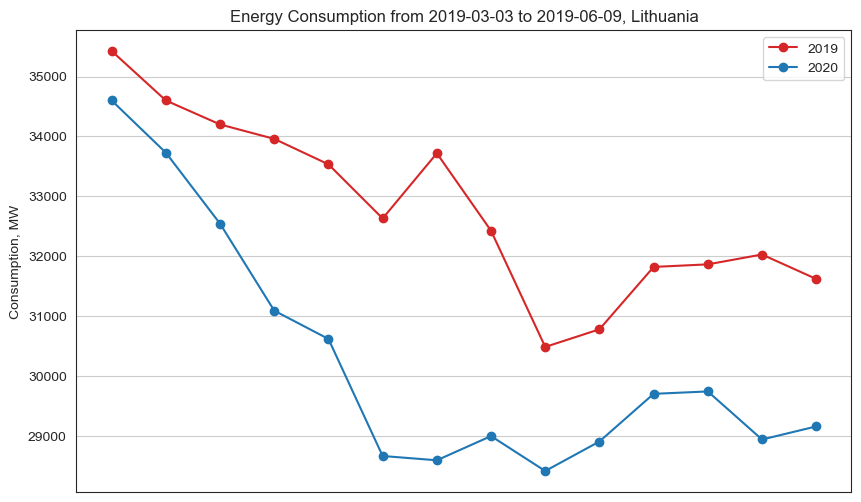

In [64]:
weekly_mean_LT['Date'] = pd.to_datetime(weekly_mean_LT['Date'])

# Filter data for the specified date ranges
filtered_data_2019 = weekly_mean_LT[(weekly_mean_LT['Date'] >= '2019-03-03') & (weekly_mean_LT['Date'] <= '2019-06-03')]
filtered_data_2020 = weekly_mean_LT[(weekly_mean_LT['Date'] >= '2020-03-03') & (weekly_mean_LT['Date'] <= '2020-06-09')]

#no dates
fd_2020= filtered_data_2020["Consumption"]
fd_2020 = pd.DataFrame(fd_2020)
fd_2020.reset_index(inplace=True)
fd_2020.drop("index", axis=1, inplace=True)

fd_2019= filtered_data_2019["Consumption"]
fd_2019 = pd.DataFrame(fd_2019)
fd_2019.reset_index(inplace=True)
fd_2019.drop("index", axis=1, inplace=True)

# Plot energy consumption for 2019 and 2020
plt.figure(figsize=(10, 6))
plt.plot(fd_2019['Consumption'], marker='o', linestyle='-', color='tab:red', label='2019')
plt.plot(fd_2020['Consumption'], marker='o', linestyle='-', color='tab:blue', label='2020')

plt.xticks([])
plt.title('Energy Consumption from 2019-03-03 to 2019-06-09, Lithuania')
plt.ylabel('Consumption, MW')
plt.grid(True)
plt.legend()
plt.show()

In [65]:
lockdown_df_EE.head()

Lockdown_Start Lockdown_End  Country
0     2020-03-13   2020-05-18  Estonia
1     2020-12-28   2021-01-17  Estonia
2     2021-03-11   2021-04-25  Estonia

Training a model to forecast the first lockdown event. Training and testing it on data before the lockdown, then forecasting during lockdown.

In [66]:
#weekly_sum_EE.reset_index(inplace=True) #Used if date change to index at some point
weekly_sum_EE.head()

Date  Consumption
0 2018-01-07  169286.5881
1 2018-01-14  190721.2722
2 2018-01-21  201737.6826
3 2018-01-28  189070.2842
4 2018-02-04  186837.9225

/var/folders/f4/x_v40yg53n1_yswsy8tvq36h0000gn/T/ipykernel_44138/2104429375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["train"] = train["Consumption"]
/var/folders/f4/x_v40yg53n1_yswsy8tvq36h0000gn/T/ipykernel_44138/2104429375.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["test"] = test["Consumption"]


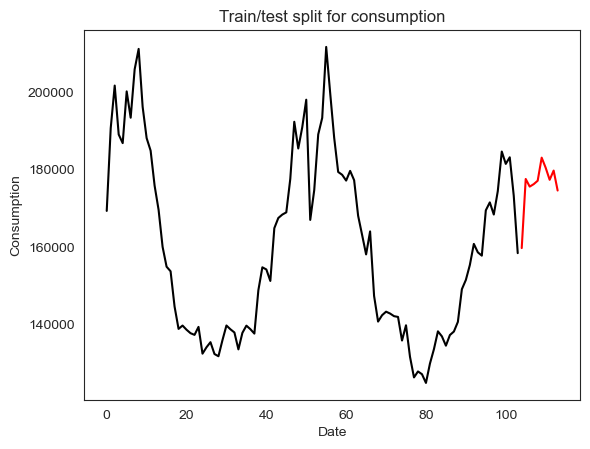

In [67]:
import seaborn as sns

train = weekly_sum_EE[weekly_sum_EE["Date"] < pd.to_datetime("2020-01-01")]
train["train"] = train["Consumption"]
del train["Date"]
del train["Consumption"]
test = weekly_sum_EE[(weekly_sum_EE["Date"] <= pd.to_datetime("2020-03-13")) & (weekly_sum_EE["Date"] >= pd.to_datetime("2020-01-01"))]
test["test"] = test["Consumption"]
del test["Date"]
del test["Consumption"]
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/test split for consumption")
plt.ylabel("Consumption")
plt.xlabel("Date")
sns.set()
plt.show()

In [68]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace = True, error_action = "ignore", surpress_warnings = True)
model.fit(train)
forecast = model.predict(n_periods = len(test))
forecast = pd.DataFrame(forecast, index = test.index, columns = ["Prediction"])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2389.365, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2162.492, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2791.265, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2163.429, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2163.254, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2159.416, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2160.473, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2162.687, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2164.692, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2163.816, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 0.616 seconds


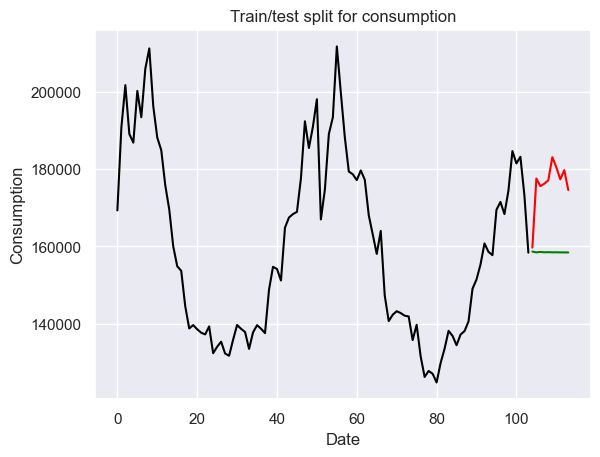

In [69]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast, color = "green")
plt.title("Train/test split for consumption")
plt.ylabel("Consumption")
plt.xlabel("Date")
sns.set()
plt.show()

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = model.get_params()["order"]

best_seasonal_order = None
best_AIC = float("inf")

for seasonal_order in [(p, d, q , s) for p in range(3) for d in range(2) for q in range(3) for s in [52]]:
    try:
        sarima_model = SARIMAX(train, order=(order[0], 1, order[1]), seasonal_order = seasonal_order)
        sarima_result = sarima_model.fit(disp=False)
        
        if sarima_result.aic < best_AIC:
            best_AIC = sarima_result.aic
            best_seasonal_order = seasonal_order
            
    except:
        continue
        
sarima_model = SARIMAX(train, order=(order[0], order[1], order[2]), seasonal_order = best_seasonal_order)
sarima_result = sarima_model.fit(disp=False)

/Users/normunds/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/normunds/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/normunds/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/normunds/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/

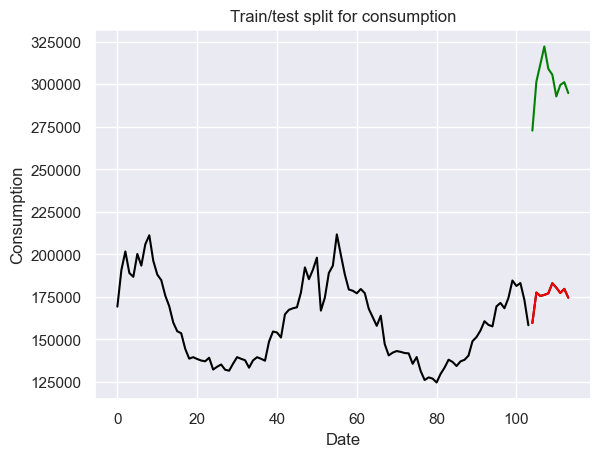

In [71]:
forecast_Sarima = sarima_result.get_forecast(steps=len(test))
forecast_summary = forecast_Sarima.summary_frame()

forecast_index = forecast_summary.index
forecast_values = forecast_summary['mean'].values
forecast_df = pd.DataFrame(forecast_values, index = forecast_index, columns = ["Prediction"])

plt.plot(test, color = "black")
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast_df, color = "green")
plt.title("Train/test split for consumption")
plt.ylabel("Consumption")
plt.xlabel("Date")
sns.set()
plt.show()

In [72]:
print(best_seasonal_order)

(2, 1, 1, 52)


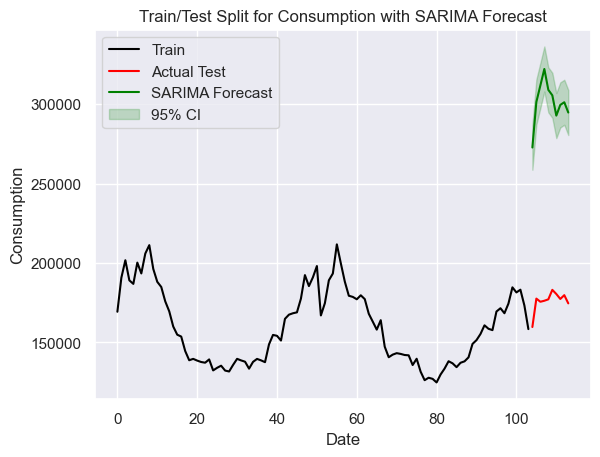

In [73]:
forecast_Sarima = sarima_result.get_forecast(steps=len(test))
forecast_summary = forecast_Sarima.summary_frame()

forecast_index = forecast_summary.index
forecast_values = forecast_summary['mean'].values
lower_confidence = forecast_summary['mean_ci_lower'].values
upper_confidence = forecast_summary['mean_ci_upper'].values

# Create DataFrames for the forecast values and confidence intervals
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=["Prediction"])
lower_df = pd.DataFrame(lower_confidence, index=forecast_index, columns=["Lower 95% CI"])
upper_df = pd.DataFrame(upper_confidence, index=forecast_index, columns=["Upper 95% CI"])

# Plotting
plt.plot(train, color="black", label="Train")
plt.plot(test, color="red", label="Actual Test")
plt.plot(forecast_df, color="green", label="SARIMA Forecast")
plt.fill_between(forecast_index, lower_df['Lower 95% CI'], upper_df['Upper 95% CI'], color='green', alpha=0.2, label='95% CI')

plt.title("Train/Test Split for Consumption with SARIMA Forecast")
plt.ylabel("Consumption")
plt.xlabel("Date")
plt.legend()
sns.set()
plt.show()

In [74]:
train.head()

train
0  169286.5881
1  190721.2722
2  201737.6826
3  189070.2842
4  186837.9225

/Users/normunds/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


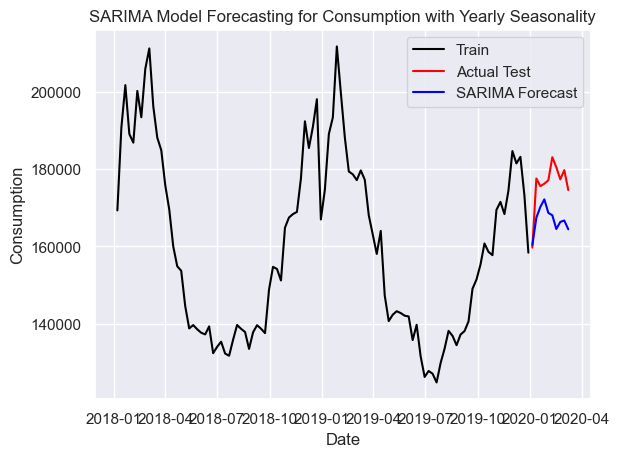

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming weekly_sum_EE is your DataFrame with "Date" and "Consumption" columns

# Train/test split
train = weekly_sum_EE[weekly_sum_EE["Date"] < pd.to_datetime("2020-01-01")]
test = weekly_sum_EE[(weekly_sum_EE["Date"] <= pd.to_datetime("2020-03-13")) & (weekly_sum_EE["Date"] >= pd.to_datetime("2020-01-01"))]

# SARIMA Model with yearly seasonality (s=52 for weekly data)
sarima_order = (1, 0, 1, 52)
sarima_model = SARIMAX(endog=train["Consumption"], order=(1, 0, 1), seasonal_order=sarima_order)
sarima_result = sarima_model.fit(disp=False)

# Forecasting with SARIMA
sarima_forecast = sarima_result.get_forecast(steps=len(test))
sarima_forecast_df = sarima_forecast.predicted_mean

# Plotting SARIMA results
plt.plot(train["Date"], train["Consumption"], color="black", label="Train")
plt.plot(test["Date"], test["Consumption"], color="red", label="Actual Test")
plt.plot(test["Date"], sarima_forecast_df, color="blue", label="SARIMA Forecast")
plt.title("SARIMA Model Forecasting for Consumption with Yearly Seasonality")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.legend()
plt.show()

/Users/normunds/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/normunds/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


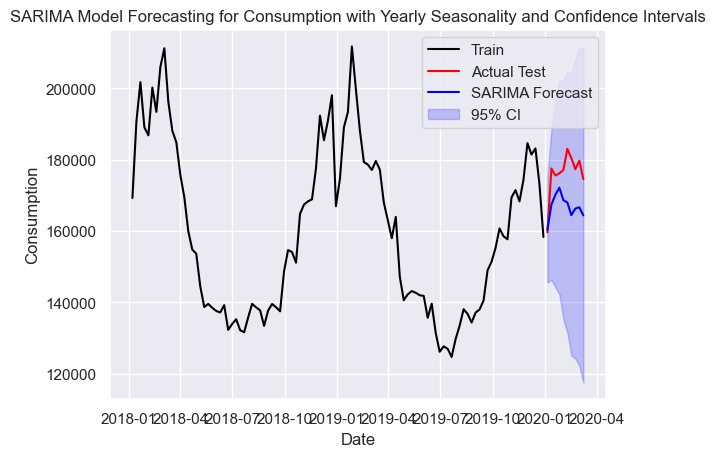

In [76]:
# Train/test split
train = weekly_sum_EE[weekly_sum_EE["Date"] < pd.to_datetime("2020-01-01")]
test = weekly_sum_EE[(weekly_sum_EE["Date"] <= pd.to_datetime("2020-03-13")) & (weekly_sum_EE["Date"] >= pd.to_datetime("2020-01-01"))]

# SARIMA Model with yearly seasonality (s=52 for weekly data)
sarima_order = (1, 0, 1, 52)
sarima_model = SARIMAX(endog=train["Consumption"], order=(1, 0, 1), seasonal_order=sarima_order)
sarima_result = sarima_model.fit(disp=False)

# Forecasting with SARIMA including confidence intervals
sarima_forecast = sarima_result.get_forecast(steps=len(test), alpha=0.05)  # 95% confidence interval
sarima_forecast_df = sarima_forecast.predicted_mean
ci_intervals = sarima_forecast.conf_int()

# Plotting SARIMA results with confidence intervals
plt.plot(train["Date"], train["Consumption"], color="black", label="Train")
plt.plot(test["Date"], test["Consumption"], color="red", label="Actual Test")
plt.plot(test["Date"], sarima_forecast_df, color="blue", label="SARIMA Forecast")
plt.fill_between(test["Date"], ci_intervals.iloc[:, 0], ci_intervals.iloc[:, 1], color='blue', alpha=0.2, label='95% CI')
plt.title("SARIMA Model Forecasting for Consumption with Yearly Seasonality and Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.legend()
plt.show()

In [77]:
weekly_sum_LT.reset_index(inplace=True)
weekly_sum_LT.head()

Date  Consumption
0 2018-01-07    233098.11
1 2018-01-14    256354.84
2 2018-01-21    262044.67
3 2018-01-28    260927.97
4 2018-02-04    251129.51

/Users/normunds/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/normunds/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


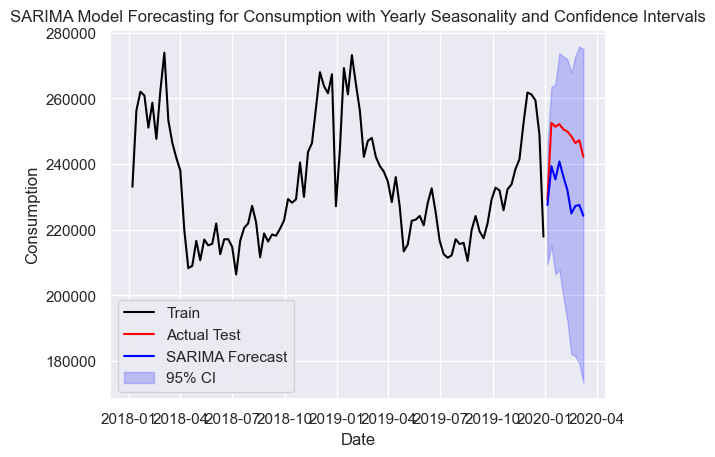

In [78]:
# Train/test split
train = weekly_sum_LT[weekly_sum_LT["Date"] < pd.to_datetime("2020-01-01")]
test = weekly_sum_LT[(weekly_sum_LT["Date"] <= pd.to_datetime("2020-03-13")) & (weekly_sum_LT["Date"] >= pd.to_datetime("2020-01-01"))]

# SARIMA Model with yearly seasonality
sarima_order = (1, 0, 1, 52)
sarima_model = SARIMAX(endog=train["Consumption"], order=(1, 0, 1), seasonal_order=sarima_order)
sarima_result = sarima_model.fit(disp=False)

# Forecasting with SARIMA including confidence intervals
sarima_forecast = sarima_result.get_forecast(steps=len(test), alpha=0.05)  # 95% confidence interval
sarima_forecast_df = sarima_forecast.predicted_mean
ci_intervals = sarima_forecast.conf_int()

# Plotting SARIMA results with confidence intervals
plt.plot(train["Date"], train["Consumption"], color="black", label="Train")
plt.plot(test["Date"], test["Consumption"], color="red", label="Actual Test")
plt.plot(test["Date"], sarima_forecast_df, color="blue", label="SARIMA Forecast")
plt.fill_between(test["Date"], ci_intervals.iloc[:, 0], ci_intervals.iloc[:, 1], color='blue', alpha=0.2, label='95% CI')
plt.title("SARIMA Model Forecasting for Consumption with Yearly Seasonality and Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.legend()
plt.show()

In [79]:
weekly_sum_LV.reset_index(inplace=True)
weekly_sum_LV.head()

Date  Consumption
0 2018-01-07     143167.0
1 2018-01-14     156984.0
2 2018-01-21     163167.0
3 2018-01-28     160573.0
4 2018-02-04     132545.0

/Users/normunds/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/normunds/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


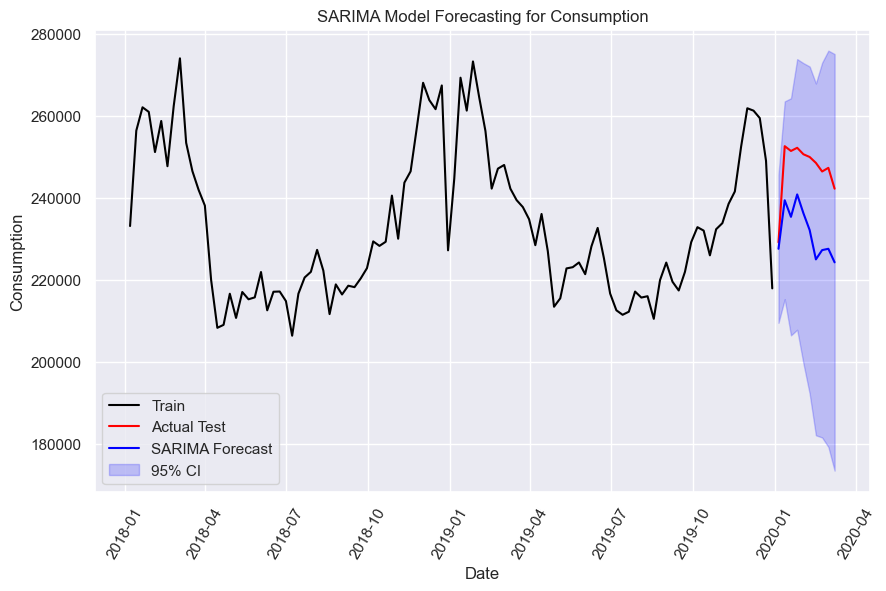

In [80]:
# Train/test split
train = weekly_sum_LT[weekly_sum_LV["Date"] < pd.to_datetime("2020-01-01")]
test = weekly_sum_LT[(weekly_sum_LV["Date"] <= pd.to_datetime("2020-03-13")) & (weekly_sum_LT["Date"] >= pd.to_datetime("2020-01-01"))]

# SARIMA Model with yearly seasonality
sarima_order = (1, 0, 1, 52)
sarima_model = SARIMAX(endog=train["Consumption"], order=(1, 0, 1), seasonal_order=sarima_order)
sarima_result = sarima_model.fit(disp=False)

# Forecasting with SARIMA including confidence intervals
sarima_forecast = sarima_result.get_forecast(steps=len(test), alpha=0.05)  # 95% confidence interval
sarima_forecast_df = sarima_forecast.predicted_mean
ci_intervals = sarima_forecast.conf_int()

# Plotting SARIMA results with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(train["Date"], train["Consumption"], color="black", label="Train")
plt.plot(test["Date"], test["Consumption"], color="red", label="Actual Test")
plt.plot(test["Date"], sarima_forecast_df, color="blue", label="SARIMA Forecast")
plt.fill_between(test["Date"], ci_intervals.iloc[:, 0], ci_intervals.iloc[:, 1], color='blue', alpha=0.2, label='95% CI')
plt.title("SARIMA Model Forecasting for Consumption")
plt.xticks(rotation=60)
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.legend()
plt.savefig("figure6.pdf")
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=inf, Time=2.60 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=2389.365, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=2158.864, Time=0.38 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2791.265, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=2162.492, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[52] intercept   : AIC=2160.862, Time=1.81 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=2160.860, Time=0.47 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=2159.360, Time=0.19 sec
 ARIMA(1,0,0)(2,0,1)[52] intercept   : AIC=2162.860, Time=2.71 sec
 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=2390.935, Time=0.16 sec
 ARIMA(2,0,0)(1,0,0)[52] intercept   : AIC=2160.046, Time=0.76 sec
 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=2159.730, Time=0.72 sec
 ARIMA(0,0,1)(1,0,0)[52] intercept   : AIC=2321.032, Time=0.50 sec
 ARIMA(2,0,1)(1,0,0)[52] inte

/Users/normunds/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


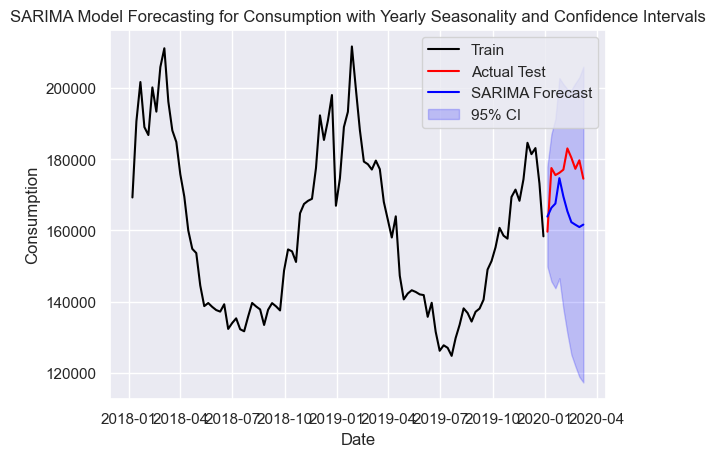

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train/test split
train = weekly_sum_EE[weekly_sum_EE["Date"] < pd.to_datetime("2020-01-01")]
test = weekly_sum_EE[(weekly_sum_EE["Date"] <= pd.to_datetime("2020-03-13")) & (weekly_sum_EE["Date"] >= pd.to_datetime("2020-01-01"))]

# Auto SARIMA Model with yearly seasonality
sarima_model = auto_arima(train["Consumption"], seasonal=True, m=52, trace=True, suppress_warnings=True)
sarima_order = sarima_model.get_params()['order']
sarima_seasonal_order = sarima_model.get_params()['seasonal_order']

# SARIMA Model
sarima_model = SARIMAX(endog=train["Consumption"], order=sarima_order, seasonal_order=sarima_seasonal_order)
sarima_result = sarima_model.fit(disp=False)

# Forecasting with SARIMA including confidence intervals
sarima_forecast = sarima_result.get_forecast(steps=len(test), alpha=0.05)  # 95% confidence interval
sarima_forecast_df = sarima_forecast.predicted_mean
ci_intervals = sarima_forecast.conf_int()

# Plotting SARIMA results with confidence intervals
plt.plot(train["Date"], train["Consumption"], color="black", label="Train")
plt.plot(test["Date"], test["Consumption"], color="red", label="Actual Test")
plt.plot(test["Date"], sarima_forecast_df, color="blue", label="SARIMA Forecast")
plt.fill_between(test["Date"], ci_intervals.iloc[:, 0], ci_intervals.iloc[:, 1], color='blue', alpha=0.2, label='95% CI')
plt.title("SARIMA Model Forecasting for Consumption with Yearly Seasonality and Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.legend()
plt.show()


Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : BIC=inf, Time=2.51 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : BIC=2394.654, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : BIC=2169.442, Time=0.37 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : BIC=inf, Time=0.90 sec
 ARIMA(0,0,0)(0,0,0)[52]             : BIC=2793.910, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : BIC=2170.425, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[52] intercept   : BIC=2174.084, Time=1.83 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : BIC=2174.082, Time=0.49 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : BIC=2169.937, Time=0.20 sec
 ARIMA(1,0,0)(2,0,1)[52] intercept   : BIC=2178.726, Time=2.68 sec
 ARIMA(0,0,0)(1,0,0)[52] intercept   : BIC=2398.868, Time=0.16 sec
 ARIMA(2,0,0)(1,0,0)[52] intercept   : BIC=2173.268, Time=0.72 sec
 ARIMA(1,0,1)(1,0,0)[52] intercept   : BIC=2172.952, Time=0.69 sec
 ARIMA(0,0,1)(1,0,0)[52] intercept   : BIC=2331.609, Time=0.47 sec
 ARIMA(2,0,1)(1,0,0)[52] inte

/Users/normunds/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


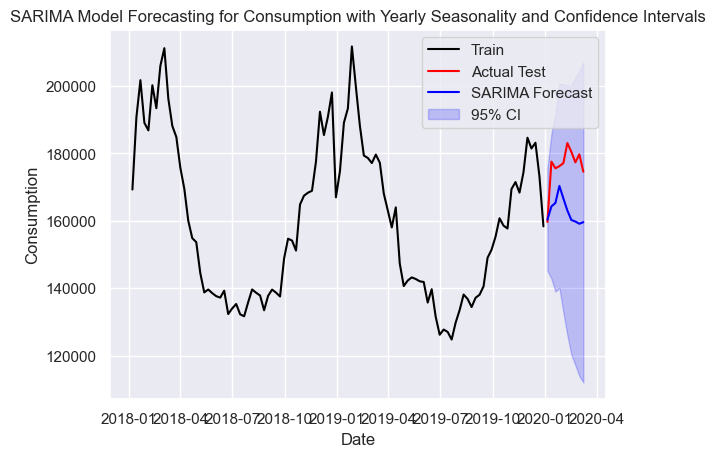

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train/test split
train = weekly_sum_EE[weekly_sum_EE["Date"] < pd.to_datetime("2020-01-01")]
test = weekly_sum_EE[(weekly_sum_EE["Date"] <= pd.to_datetime("2020-03-13")) & (weekly_sum_EE["Date"] >= pd.to_datetime("2020-01-01"))]

# Auto SARIMA Model with yearly seasonalit
sarima_model = auto_arima(train["Consumption"], seasonal=True, m=52, trace=True, suppress_warnings=True,
                          information_criterion='bic', 
                          metric='mse'
                          )
sarima_order = sarima_model.get_params()['order']
sarima_seasonal_order = sarima_model.get_params()['seasonal_order']

# SARIMA Model
sarima_model = SARIMAX(endog=train["Consumption"], order=sarima_order, seasonal_order=sarima_seasonal_order)
sarima_result = sarima_model.fit(disp=False)

# Forecasting with SARIMA including confidence intervals
sarima_forecast = sarima_result.get_forecast(steps=len(test), alpha=0.05)  # 95% confidence interval
sarima_forecast_df = sarima_forecast.predicted_mean
ci_intervals = sarima_forecast.conf_int()

# Plotting SARIMA results with confidence intervals
plt.plot(train["Date"], train["Consumption"], color="black", label="Train")
plt.plot(test["Date"], test["Consumption"], color="red", label="Actual Test")
plt.plot(test["Date"], sarima_forecast_df, color="blue", label="SARIMA Forecast")
plt.fill_between(test["Date"], ci_intervals.iloc[:, 0], ci_intervals.iloc[:, 1], color='blue', alpha=0.2, label='95% CI')
plt.title("SARIMA Model Forecasting for Consumption with Yearly Seasonality and Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=inf, Time=2.59 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=2389.365, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=2158.864, Time=0.37 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2791.265, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=2162.492, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[52] intercept   : AIC=2160.862, Time=1.73 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=2160.860, Time=0.47 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=2159.360, Time=0.19 sec
 ARIMA(1,0,0)(2,0,1)[52] intercept   : AIC=2162.860, Time=2.73 sec
 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=2390.935, Time=0.16 sec
 ARIMA(2,0,0)(1,0,0)[52] intercept   : AIC=2160.046, Time=0.71 sec
 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=2159.730, Time=0.69 sec
 ARIMA(0,0,1)(1,0,0)[52] intercept   : AIC=2321.032, Time=0.47 sec
 ARIMA(2,0,1)(1,0,0)[52] inte

/Users/normunds/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


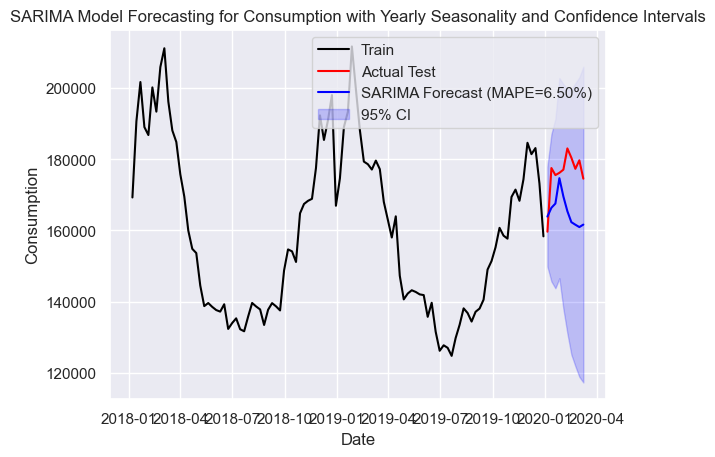

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Train/test split
train = weekly_sum_EE[weekly_sum_EE["Date"] < pd.to_datetime("2020-01-01")]
test = weekly_sum_EE[(weekly_sum_EE["Date"] <= pd.to_datetime("2020-03-13")) & (weekly_sum_EE["Date"] >= pd.to_datetime("2020-01-01"))]

# Auto SARIMA Model with yearly seasonality
sarima_model = auto_arima(train["Consumption"], seasonal=True, m=52, trace=True, suppress_warnings=True,
                          information_criterion='aic',
                          metric='mape'
                          )
sarima_order = sarima_model.get_params()['order']
sarima_seasonal_order = sarima_model.get_params()['seasonal_order']

# SARIMA Model
sarima_model = SARIMAX(endog=train["Consumption"], order=sarima_order, seasonal_order=sarima_seasonal_order)
sarima_result = sarima_model.fit(disp=False)

# Forecasting with SARIMA including confidence intervals
sarima_forecast = sarima_result.get_forecast(steps=len(test), alpha=0.05)  # 95% confidence interval
sarima_forecast_df = sarima_forecast.predicted_mean
ci_intervals = sarima_forecast.conf_int()

# Calculate MAPE
actual_values = test["Consumption"].values
forecast_values = sarima_forecast_df.values
mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100

# Plotting SARIMA results with confidence intervals and MAPE
plt.plot(train["Date"], train["Consumption"], color="black", label="Train")
plt.plot(test["Date"], test["Consumption"], color="red", label="Actual Test")
plt.plot(test["Date"], sarima_forecast_df, color="blue", label="SARIMA Forecast (MAPE=%.2f%%)" % mape)
plt.fill_between(test["Date"], ci_intervals.iloc[:, 0], ci_intervals.iloc[:, 1], color='blue', alpha=0.2, label='95% CI')
plt.title("SARIMA Model Forecasting for Consumption with Yearly Seasonality and Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.legend()
plt.show()


import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Extract the univariate time series
y_train = train['Consumption']

# Step 1: Find the best order using auto_arima
model = auto_arima(y_train, trace=True, error_action="ignore", suppress_warnings=True)
order = model.get_params()["order"]

# Step 2: Find the best seasonal order for SARIMA
best_AIC = float("inf")
best_seasonal_order = None

# Loop through combinations of seasonal orders
for seasonal_order in [(p, d, q, s) for p in range(3) for d in range(2) for q in range(3) for s in [4, 12, 52]]:
    try:
        # Fit SARIMA model
        sarima_model = SARIMAX(y_train, order=(order[0], 1, order[1]), seasonal_order=seasonal_order)
        sarima_result = sarima_model.fit(disp=False)

        # Update best model if current AIC is lower
        if sarima_result.aic < best_AIC:
            best_AIC = sarima_result.aic
            best_seasonal_order = seasonal_order

    except:
        continue

# Step 3: Fit the best SARIMA model
best_sarima_model = SARIMAX(y_train, order=(order[0], 1, order[1]), seasonal_order=best_seasonal_order)
best_sarima_result = best_sarima_model.fit(disp=False)

# Step 4: Forecasting
forecast_best = best_sarima_result.get_forecast(steps=len(test))
forecast_index_best = forecast_best.predicted_mean.index
forecast_values_best = forecast_best.predicted_mean.values


# Step 5: Create DataFrames for the forecast values
forecast_df_best = pd.DataFrame(forecast_values_best, index=forecast_index_best, columns=["Best SARIMA Forecast"])

# Step 6: Plotting
plt.plot(train, color="black", label="Train")
plt.plot(test, color="red", label="Actual Test")
plt.plot(forecast_df_best, color="green", label="Best SARIMA Forecast")
plt.title("Train/Test Split for Consumption with Best SARIMA Forecast")
plt.ylabel("Consumption")
plt.xlabel("Date")
plt.legend()
plt.show()


#dc_EE.reset_index(inplace=True)
dc_EE.head()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train/test split
train = dc_EE[dc_EE["Date"] < pd.to_datetime("2020-01-01")]
test = dc_EE[(dc_EE["Date"] <= pd.to_datetime("2020-03-13")) & (dc_EE["Date"] >= pd.to_datetime("2020-01-01"))]

# Auto SARIMA Model with yearly seasonality
sarima_model = auto_arima(train["Consumption"], seasonal=True, m=365, trace=True,
                          information_criterion='aic'
                          )
sarima_order = sarima_model.get_params()['order']
sarima_seasonal_order = sarima_model.get_params()['seasonal_order']

# SARIMA Model
sarima_model = SARIMAX(endog=train["Consumption"], order=sarima_order, seasonal_order=sarima_seasonal_order)
sarima_result = sarima_model.fit(disp=False)

# Forecasting with SARIMA including confidence intervals
sarima_forecast = sarima_result.get_forecast(steps=len(test), alpha=0.05)  # 95% confidence interval
sarima_forecast_df = sarima_forecast.predicted_mean
ci_intervals = sarima_forecast.conf_int()

# Plotting SARIMA results with confidence intervals
plt.plot(train["Date"], train["Consumption"], color="black", label="Train")
plt.plot(test["Date"], test["Consumption"], color="red", label="Actual Test")
plt.plot(test["Date"], sarima_forecast_df, color="blue", label="SARIMA Forecast")
plt.fill_between(test["Date"], ci_intervals.iloc[:, 0], ci_intervals.iloc[:, 1], color='blue', alpha=0.2, label='95% CI')
plt.title("SARIMA Model Forecasting for Consumption with Yearly Seasonality and Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.legend()
plt.show()


Previous step takes too long!!!

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train/test split
train = dc_EE[dc_EE["Date"] < pd.to_datetime("2020-01-01")]
test = dc_EE[(dc_EE["Date"] <= pd.to_datetime("2020-03-13")) & (dc_EE["Date"] >= pd.to_datetime("2020-01-01"))]

# Auto SARIMA Model with yearly seasonality
sarima_model = auto_arima(train["Consumption"], seasonal=True, m=365, trace=True, suppress_warnings=True,
                          information_criterion='bic',
                          metric='mse',
                          start_p=1, max_p=2, start_q=1, max_q=2,
                          n_jobs=-1 
                          )
sarima_order = sarima_model.get_params()['order']
sarima_seasonal_order = sarima_model.get_params()['seasonal_order']

# SARIMA Model
sarima_model = SARIMAX(endog=train["Consumption"], order=sarima_order, seasonal_order=sarima_seasonal_order)
sarima_result = sarima_model.fit(disp=False)

# Forecasting with SARIMA including confidence intervals
sarima_forecast = sarima_result.get_forecast(steps=len(test), alpha=0.05)  # 95% confidence interval
sarima_forecast_df = sarima_forecast.predicted_mean
ci_intervals = sarima_forecast.conf_int()

# Plotting SARIMA results with confidence intervals
plt.plot(train["Date"], train["Consumption"], color="black", label="Train")
plt.plot(test["Date"], test["Consumption"], color="red", label="Actual Test")
plt.plot(test["Date"], sarima_forecast_df, color="blue", label="SARIMA Forecast")
plt.fill_between(test["Date"], ci_intervals.iloc[:, 0], ci_intervals.iloc[:, 1], color='blue', alpha=0.2, label='95% CI')
plt.title("SARIMA Model Forecasting for Consumption with Yearly Seasonality and Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.legend()
plt.show()


Daily consumption datasets take too long!!!

import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from joblib import Parallel, delayed

# Train/test split
train = dc_EE[dc_EE["Date"] < pd.to_datetime("2020-01-01")]
test = dc_EE[(dc_EE["Date"] <= pd.to_datetime("2020-03-13")) & (dc_EE["Date"] >= pd.to_datetime("2020-01-01"))]

# Define a function to fit SARIMA model for a specific group
def fit_sarima(data):
    sarima_model = auto_arima(data["Consumption"], seasonal=True, m=365, trace=True, suppress_warnings=True,
                              information_criterion='bic',
                              metric='mse',
                              start_p=1, max_p=2, start_q=1, max_q=2, 
                             )
    sarima_order = sarima_model.get_params()['order']
    sarima_seasonal_order = sarima_model.get_params()['seasonal_order']

    sarima_model = SARIMAX(endog=data["Consumption"], order=sarima_order, seasonal_order=sarima_seasonal_order)
    sarima_result = sarima_model.fit(disp=False)

    forecast = sarima_result.get_forecast(steps=len(test), alpha=0.05)
    forecast_values = forecast.predicted_mean
    ci_intervals = forecast.conf_int()

    return forecast_values, ci_intervals

# Parallelize the SARIMA model fitting for different training data
sarima_forecasts = Parallel(n_jobs=-1)(delayed(fit_sarima)(data) for _, data in train.groupby("Consumption"))

# Combine the forecasts from different groups
sarima_forecast_df = pd.concat([forecast[0] for forecast in sarima_forecasts], axis=1)
ci_intervals = pd.concat([forecast[1] for forecast in sarima_forecasts], axis=1)

# Plotting SARIMA results with confidence intervals
plt.plot(train["Date"], train["Consumption"], color="black", label="Train")
plt.plot(test["Date"], test["Consumption"], color="red", label="Actual Test")
plt.plot(test["Date"], sarima_forecast_df.mean(axis=1), color="blue", label="SARIMA Forecast")
plt.fill_between(test["Date"], ci_intervals.mean(axis=1), color='blue', alpha=0.2, label='95% CI')

plt.title("SARIMA Model Forecasting for Consumption with Yearly Seasonality and Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.legend()
plt.show()


Splitting this way to different cores splits up the data too much, no good result

import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error


# Train/test split
train = dc_EE[dc_EE["Date"] < pd.to_datetime("2020-01-01")]
test = dc_EE[(dc_EE["Date"] >= pd.to_datetime("2020-01-01")) & (dc_EE["Date"] <= pd.to_datetime("2020-03-13"))]

# Define a function to fit SARIMA model with hyperparameter tuning
def fit_sarima(data, order, seasonal_order):
    sarima_model = SARIMAX(endog=data["Consumption"], order=order, seasonal_order=seasonal_order)
    sarima_result = sarima_model.fit(disp=False)
    forecast = sarima_result.get_forecast(steps=len(test), alpha=0.05)
    forecast_values = forecast.predicted_mean
    return forecast_values

# Hyperparameter tuning using MAPE
best_mape = float('inf')
best_order = None
best_seasonal_order = None

for p in range(1, 3):
    for d in range(1, 2):
        for q in range(1, 3):
            for P in range(1, 2):
                for D in range(1, 2):
                    for Q in range(1, 2):
                        try:
                            order = (p, d, q)
                            seasonal_order = (P, D, Q, 365)  # Assuming yearly seasonality
                            
                            forecast_values = fit_sarima(train, order, seasonal_order)
                            mape = mean_absolute_error(test["Consumption"], forecast_values) / test["Consumption"].mean() * 100

                            if mape < best_mape:
                                best_mape = mape
                                best_order = order
                                best_seasonal_order = seasonal_order

                        except Exception as e:
                            print(f"Error for order {order} and seasonal_order {seasonal_order}: {e}")

# Fit the SARIMA model with the best hyperparameters
final_forecast = fit_sarima(dc_EE, best_order, best_seasonal_order)

# Plotting SARIMA results
plt.plot(train["Date"], train["Consumption"], color="black", label="Train")
plt.plot(test["Date"], test["Consumption"], color="red", label="Actual Test")
plt.plot(test["Date"], final_forecast, color="blue", label="SARIMA Forecast")

plt.title("SARIMA Model Forecasting for Consumption with Yearly Seasonality")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.legend()
plt.show()


Attempting another way to analyse the consumption data

In [84]:
energy_EE.head()

DateTime  Consumption
0 2018-01-01 00:00:00     829.7639
1 2018-01-01 01:00:00     815.4053
2 2018-01-01 02:00:00     786.5032
3 2018-01-01 03:00:00     780.0486
4 2018-01-01 04:00:00     778.6814

In [85]:
%matplotlib inline

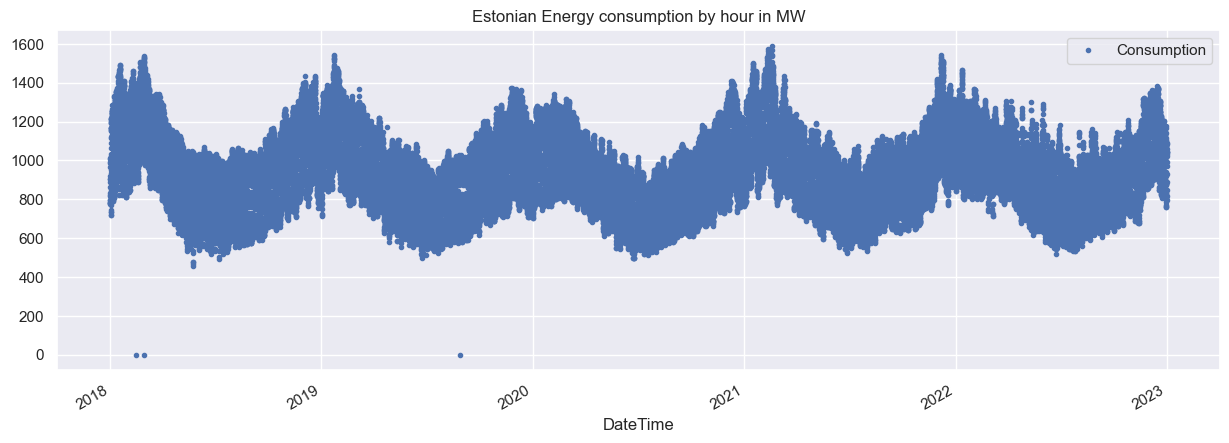

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

energy_EE = energy_EE.set_index('DateTime') #To get a proper plot
energy_EE.index = pd.to_datetime(energy_EE.index)

energy_EE.plot(style='.',
        figsize=(15, 5),
        color=sns.color_palette()[0],
        title='Estonian Energy consumption by hour in MW')
plt.show()

In [87]:
df = energy_EE.loc[energy_EE.index < '2020-03-13']

In [88]:
def create_features(df):
  
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [89]:
df.tail()

Consumption  hour  dayofweek  quarter  month  year  \
DateTime                                                                  
2020-03-12 19:00:00       1150.1    19          3        1      3  2020   
2020-03-12 20:00:00       1092.0    20          3        1      3  2020   
2020-03-12 21:00:00       1013.6    21          3        1      3  2020   
2020-03-12 22:00:00        920.9    22          3        1      3  2020   
2020-03-12 23:00:00        859.7    23          3        1      3  2020   

                     dayofyear  dayofmonth  weekofyear  
DateTime                                                
2020-03-12 19:00:00         72          12          11  
2020-03-12 20:00:00         72          12          11  
2020-03-12 21:00:00         72          12          11  
2020-03-12 22:00:00         72          12          11  
2020-03-12 23:00:00         72          12          11

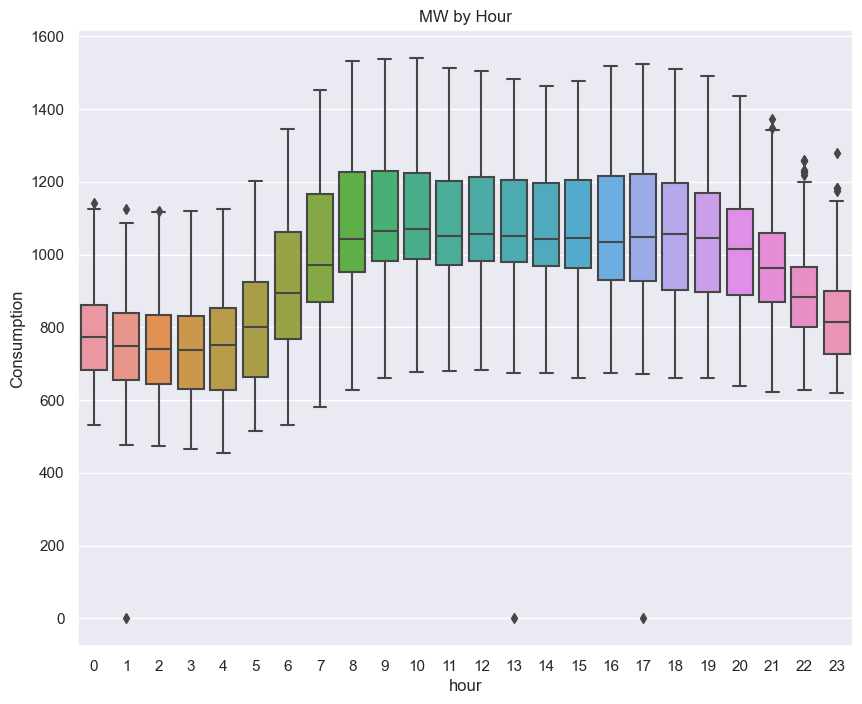

In [90]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='Consumption')
ax.set_title('MW by Hour')
plt.show()

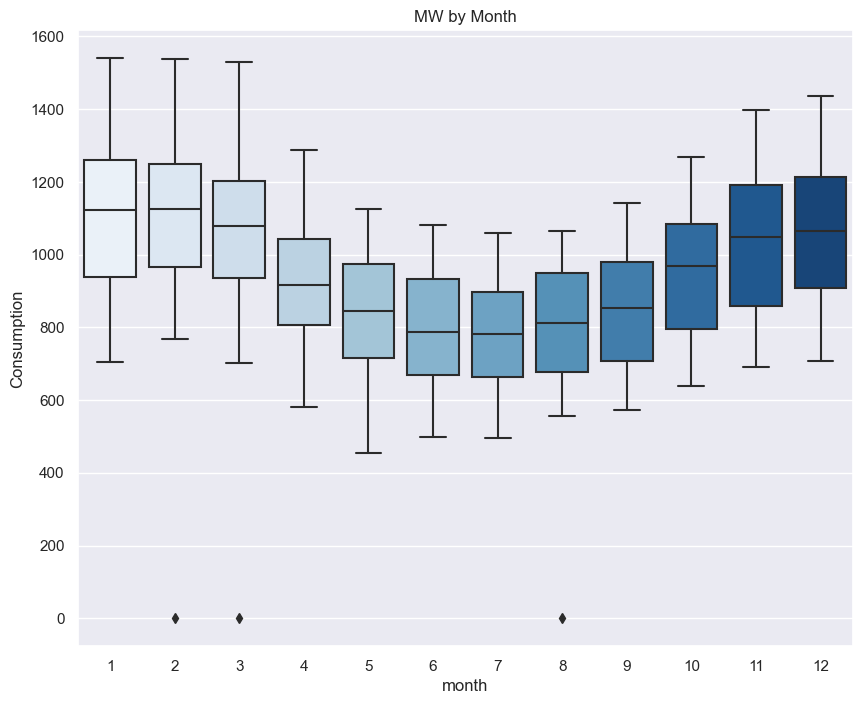

In [91]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='Consumption', palette='Blues')
ax.set_title('MW by Month')
plt.show()

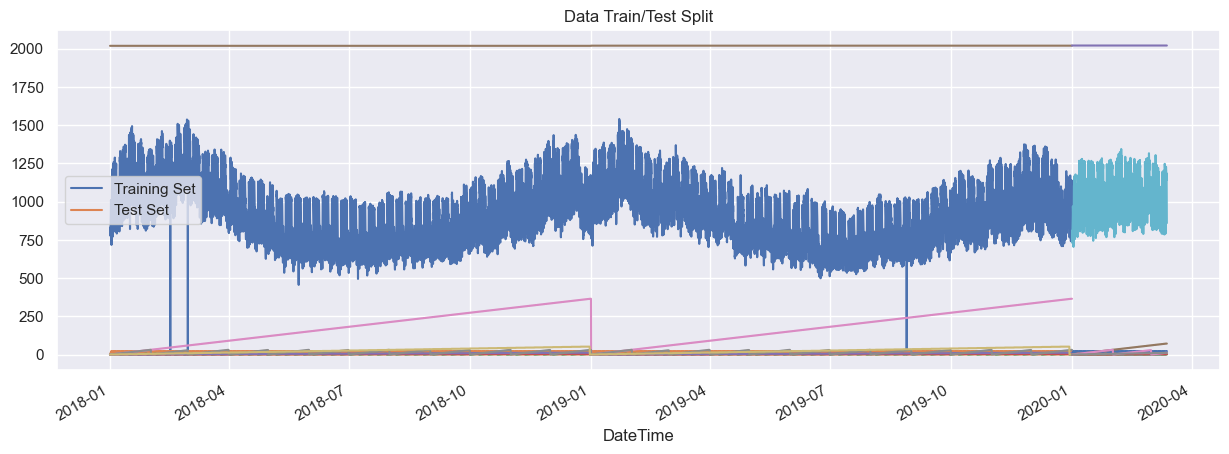

In [92]:
train = df.loc[df.index < '2020-01-01']
test = df.loc[df.index >= '2020-01-01']


fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [93]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'Consumption'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)


[0]	validation_0-rmse:962.31092	validation_1-rmse:1051.17862
[100]	validation_0-rmse:365.40574	validation_1-rmse:357.38744
[200]	validation_0-rmse:154.47158	validation_1-rmse:113.88846
[300]	validation_0-rmse:85.83682	validation_1-rmse:67.54898
[340]	validation_0-rmse:74.74700	validation_1-rmse:71.51885


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Figure size 1000x600 with 0 Axes>

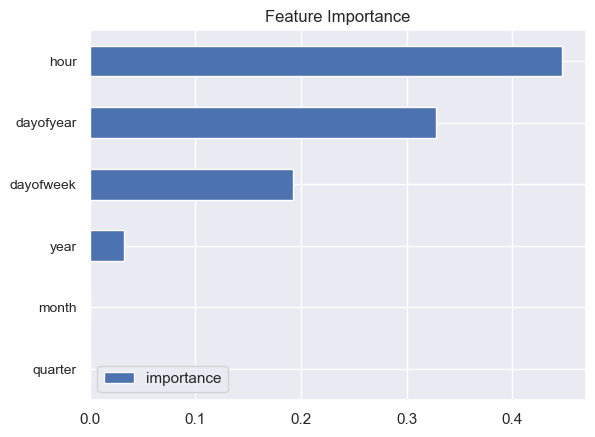

In [94]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
plt.figure(figsize=(10, 6))
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.yticks(fontsize=10)
plt.savefig("figure7.pdf")

plt.show()

/var/folders/f4/x_v40yg53n1_yswsy8tvq36h0000gn/T/ipykernel_44138/1195099407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


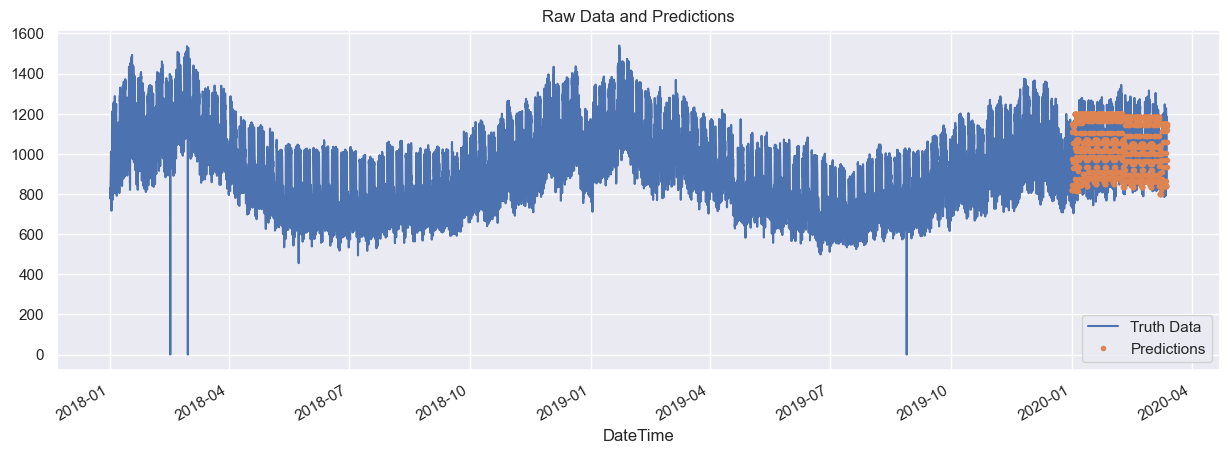

In [95]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Consumption']].plot(figsize=(15, 5))
test['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Predictions')
plt.show()

In [96]:
score = np.sqrt(mean_squared_error(test['Consumption'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 67.24


RMSE way too high for hourly consumption (estimating 5-10% error). Model is too innacurate

Trying a different method using SARMIA to get a working model

In [97]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA


In [98]:
#weekly_sum_EE.drop("Date_numeric", axis =1 , inplace=True) #Cleaning up leftover stuff from other attempts
weekly_sum_EE.head(5)

Date  Consumption
0 2018-01-07  169286.5881
1 2018-01-14  190721.2722
2 2018-01-21  201737.6826
3 2018-01-28  189070.2842
4 2018-02-04  186837.9225

In [99]:
weekly_sum_EE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         261 non-null    datetime64[ns]
 1   Consumption  261 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


In [100]:
weekly_sum_EE.set_index('Date',inplace=True)

Can change between countries at next step. EE to LT or LV

In [101]:
weekly_sum_r = weekly_sum_EE.copy()

In [102]:
#dc_EE_r.drop(["Normalized Consumption", "Log Consumption"], axis = 1, inplace = True)
weekly_sum_r.tail()

Consumption
Date                   
2022-12-04     187079.8
2022-12-11     190826.2
2022-12-18     195421.1
2022-12-25     173285.0
2023-01-01     144176.8

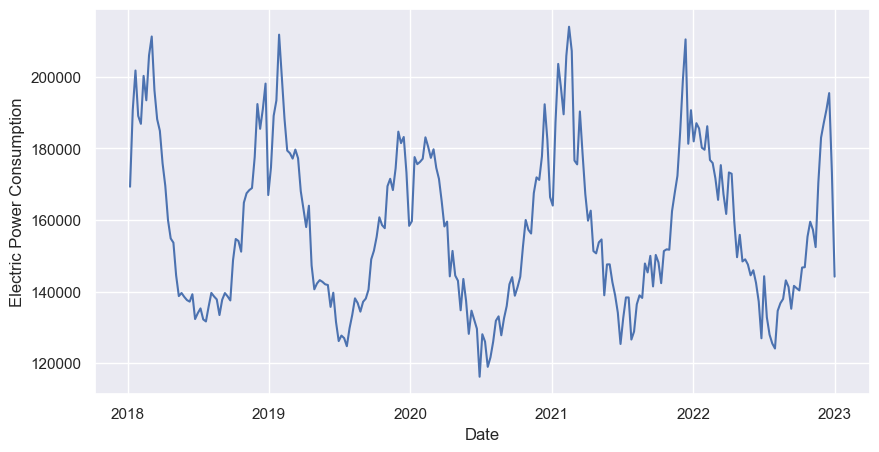

In [103]:
plt.figure(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Electric Power Consumption')
plt.plot(weekly_sum_r)

In [104]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()
    
    #Plot rolling statistics
    plt.figure(figsize=(10,5))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    elecom_test = adfuller(timeseries['Consumption'], autolag='AIC')
    dfoutput = pd.Series(elecom_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in elecom_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

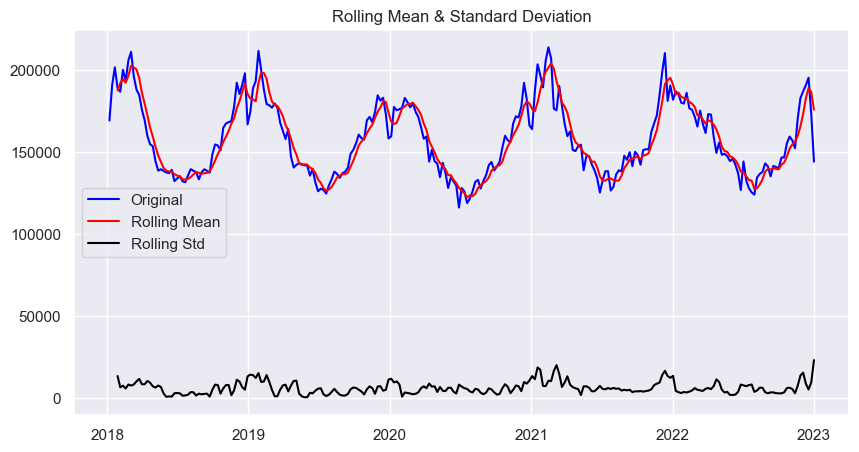

Results of Dickey Fuller Test:
Test Statistic                -5.984178e+00
p-value                        1.808633e-07
#Lags Used                     1.600000e+01
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64


In [105]:
test_stationarity(weekly_sum_r)

In [106]:
weekly_sum_r_log = np.log(weekly_sum_r)

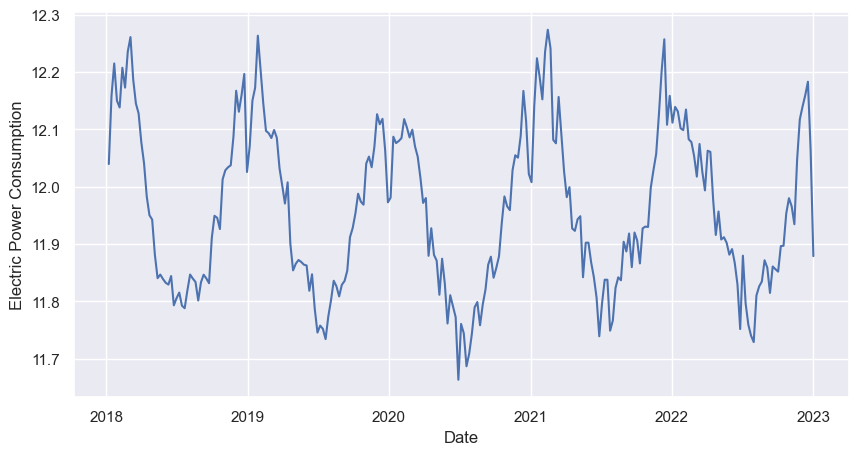

In [107]:
plt.figure(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Electric Power Consumption')
plt.plot(weekly_sum_r_log)

In [108]:
rollmean_log = weekly_sum_r_log.rolling(window=4).mean()
rollstd_log = weekly_sum_r_log.rolling(window=4).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

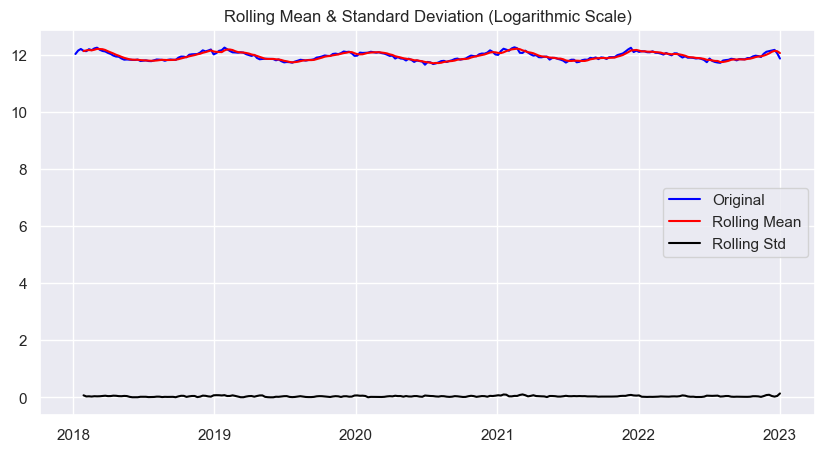

In [109]:
plt.figure(figsize=(10,5))
plt.plot(weekly_sum_r_log, color='blue', label='Original')
plt.plot(rollmean_log, color='red', label='Rolling Mean')
plt.plot(rollstd_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [110]:
weekly_sum_r_new = weekly_sum_r_log - rollmean_log

In [111]:
weekly_sum_r_new.dropna(inplace=True)
weekly_sum_r_new.head()

Consumption
Date                   
2018-01-28     0.009246
2018-02-04    -0.027294
2018-02-11     0.029775
2018-02-18     0.005674
2018-02-25     0.047097

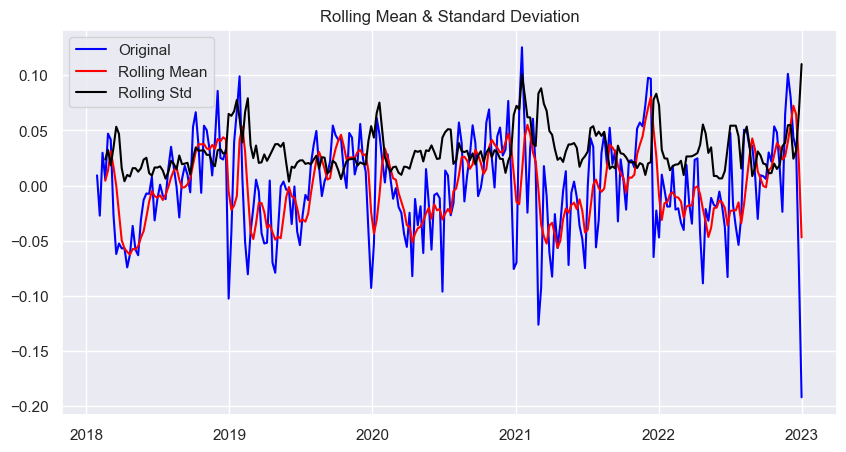

Results of Dickey Fuller Test:
Test Statistic                  -5.185233
p-value                          0.000009
#Lags Used                       3.000000
Number of Observations Used    254.000000
Critical Value (1%)             -3.456360
Critical Value (5%)             -2.872987
Critical Value (10%)            -2.572870
dtype: float64


In [112]:
test_stationarity(weekly_sum_r_new)

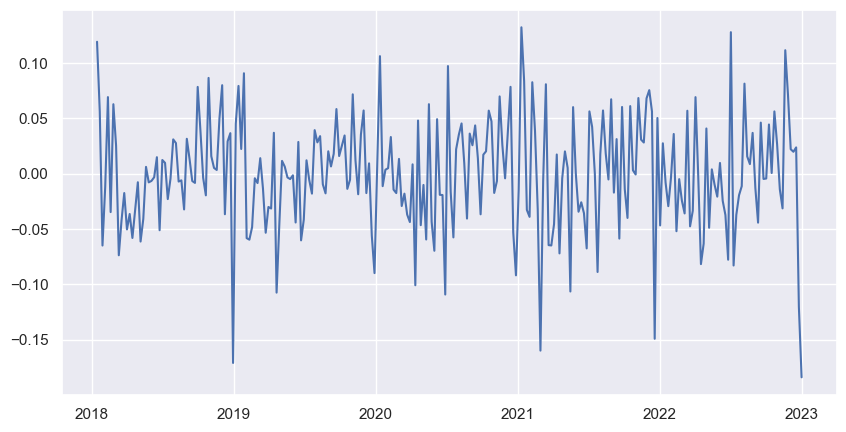

In [113]:
weekly_sum_r_log_diff = weekly_sum_r_log - weekly_sum_r_log.shift()
plt.figure(figsize=(10,5))
plt.plot(weekly_sum_r_log_diff)

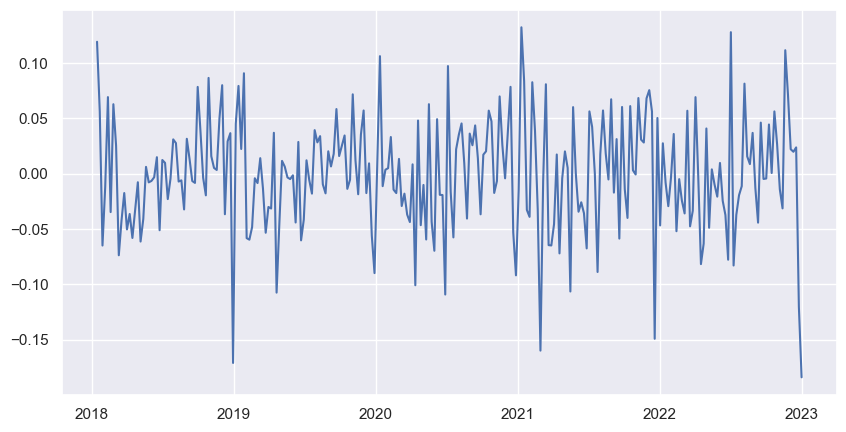

In [114]:
weekly_sum_r_log_diff.dropna(inplace=True)
plt.figure(figsize=(10,5))
plt.plot(weekly_sum_r_log_diff)

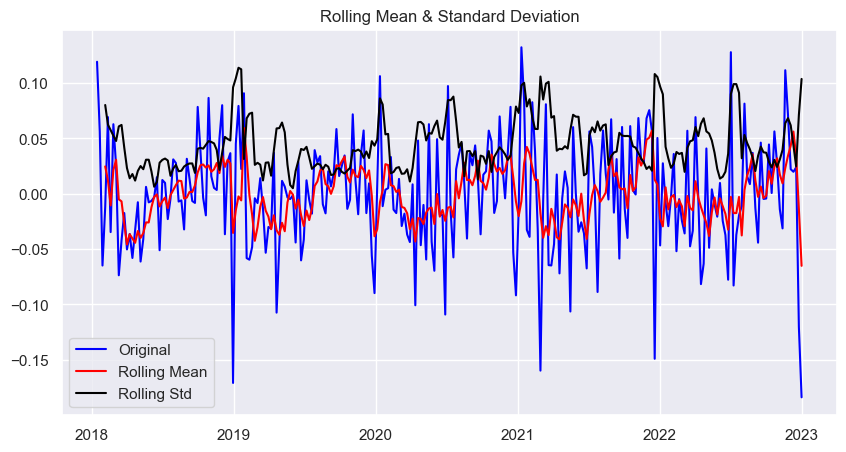

Results of Dickey Fuller Test:
Test Statistic                -6.681837e+00
p-value                        4.322626e-09
#Lags Used                     3.000000e+00
Number of Observations Used    2.560000e+02
Critical Value (1%)           -3.456155e+00
Critical Value (5%)           -2.872897e+00
Critical Value (10%)          -2.572822e+00
dtype: float64


In [115]:
test_stationarity(weekly_sum_r_log_diff)

In [116]:
weekly_sum_r.head()

Consumption
Date                   
2018-01-07  169286.5881
2018-01-14  190721.2722
2018-01-21  201737.6826
2018-01-28  189070.2842
2018-02-04  186837.9225

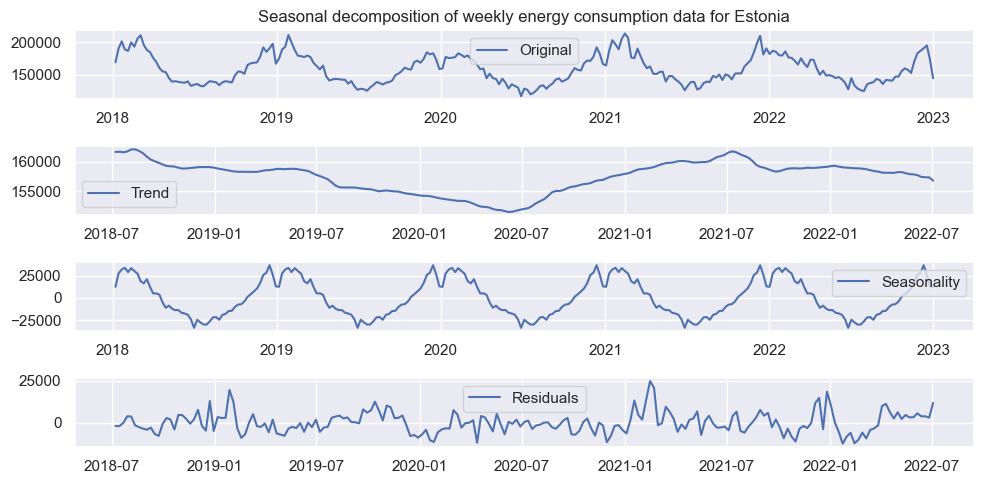

In [117]:
decomposition = seasonal_decompose(weekly_sum_r)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,5))
plt.subplot(411)
plt.plot(weekly_sum_r, label='Original')
plt.legend(loc='best')
plt.title("Seasonal decomposition of weekly energy consumption data for Estonia") #Change accordingly when saving graph
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("figure9.pdf")


In [118]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [119]:
import time


# function to create all combinations of differencing orders as needed
def differencing(timeseries, m):
    info = []
    
    # "general" differencing only (d = 0 or 1 or 2)
    for i in range(3):
        timeseries.name = f"d{i}_D0_m0"
        info.append(timeseries)
        timeseries = timeseries.diff()
    
    # seasonal differencing (D = 1) given d = 0 or 1 or 2
    for i in m:
        for j in range(3):
            timeseries = info[j].diff(periods=i)
            timeseries.name = f"d{j}_D1_m{i}"
            info.append(timeseries)
    
    # seasonal differencing (D = 2) given d = 0 or 1 or 2
    for i in m:
        for j in range(3):
            timeseries = info[j+3].diff(periods=i)
            timeseries.name = f"d{j}_D2_m{i}"
            info.append(timeseries)
        
    return pd.DataFrame(info).T

# create the differenced series
diff_series = differencing(weekly_sum_r_log['Consumption'], [52])
diff_series

d0_D0_m0  d1_D0_m0  d2_D0_m0  d0_D1_m52  d1_D1_m52  d2_D1_m52  \
Date                                                                         
2018-01-07  12.039348       NaN       NaN        NaN        NaN        NaN   
2018-01-14  12.158568  0.119220       NaN        NaN        NaN        NaN   
2018-01-21  12.214724  0.056155 -0.063065        NaN        NaN        NaN   
2018-01-28  12.149874 -0.064849 -0.121005        NaN        NaN        NaN   
2018-02-04  12.137997 -0.011877  0.052972        NaN        NaN        NaN   
...               ...       ...       ...        ...        ...        ...   
2022-12-04  12.139291  0.022151 -0.048983  -0.061397  -0.053363  -0.056373   
2022-12-11  12.159118  0.019828 -0.002323  -0.097761  -0.036364   0.016999   
2022-12-18  12.182912  0.023794  0.003966   0.075113   0.172874   0.209238   
2022-12-25  12.062693 -0.120219 -0.144013  -0.095480  -0.170592  -0.343466   
2023-01-01  11.878796 -0.183897 -0.063678  -0.232676  -0.137197   0.033396   

            d0_D2_m52  d1_D2_m52  d2_D2_m52  
Date                                         
2018-01-07        NaN        NaN        NaN  
2018-01-14        NaN        NaN        NaN  
2018-01-21        NaN        NaN        NaN  
2018-01-28        NaN        NaN        NaN  
2018-02-04        NaN        NaN        NaN  
...               ...        ...        ...  
2022-12-04  -0.173766  -0.091038  -0.021768  
2022-12-11  -0.187815  -0.014049   0.076990  
2022-12-18   0.081104   0.268919   0.282968  
2022-12-25  -0.231632  -0.312736  -0.581656  
2023-01-01  -0.336424  -0.104792   0.207944  

[261 rows x 9 columns]

In [120]:
# function to create a summary of test results of all the series
def adf_summary(diff_series):
    from statsmodels.tsa.stattools import adfuller
    summary = []
    
    for i in diff_series:
        # unpack the results
        a, b, c, d, e, f = adfuller(diff_series[i].dropna())
        g, h, i = e.values()
        results = [a, b, c, d, g, h, i]
        summary.append(results)
    
    columns = ["Test Statistic", "p-value", "#Lags Used", "No. of Obs. Used",
               "Critical Value (1%)", "Critical Value (5%)", "Critical Value (10%)"]
    index = diff_series.columns
    summary = pd.DataFrame(summary, index=index, columns=columns)
    
    return summary


# create the summary
summary = adf_summary(diff_series)

# filter away results that are not stationary
summary_passed = summary[summary["p-value"] < 0.05]
print(summary_passed.head())

# output indices as a list
index_list = pd.Index.tolist(summary_passed.index)

# use the list as a condition to select stationary time-series
passed_series = diff_series[index_list]

# sort the columns by names
ps = passed_series.sort_index(axis=1)

           Test Statistic       p-value  #Lags Used  No. of Obs. Used  \
d0_D0_m0        -6.262945  4.180153e-08          16               244   
d1_D0_m0        -6.681837  4.322626e-09           3               256   
d2_D0_m0        -9.149669  2.707904e-15           7               251   
d0_D1_m52       -3.511030  7.708286e-03           4               204   
d1_D1_m52       -6.142108  7.925544e-08          14               193   

           Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
d0_D0_m0             -3.457438            -2.873459             -2.573122  
d1_D0_m0             -3.456155            -2.872897             -2.572822  
d2_D0_m0             -3.456674            -2.873125             -2.572944  
d0_D1_m52            -3.462818            -2.875815             -2.574379  
d1_D1_m52            -3.464694            -2.876635             -2.574816  


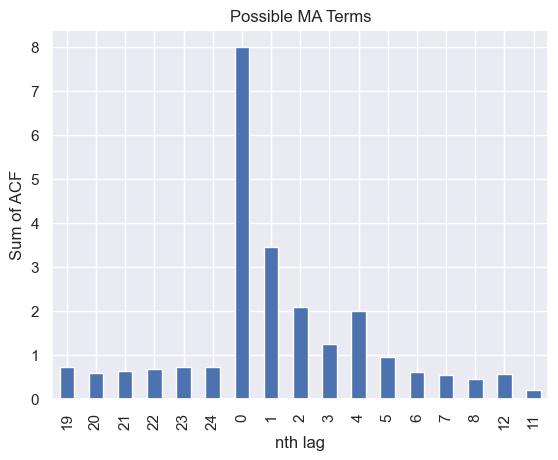

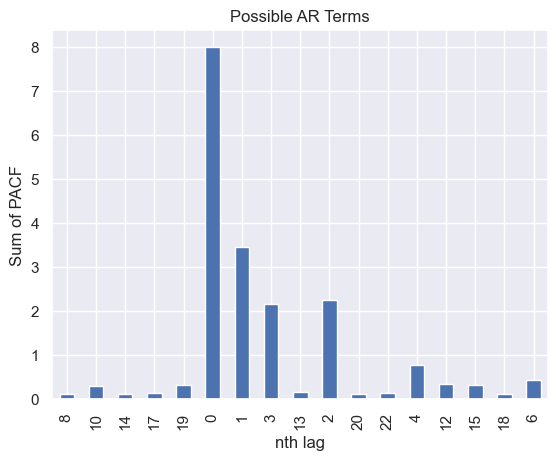

In [121]:

# ### Calculate ACF & PACF for the resulting series

# store all values of significant spikes by nlags in PACF plots
from statsmodels.tsa.stattools import pacf

# create an empty dataframe to store values
df_sp_p = pd.DataFrame()
AR = []
for i in ps:
    # unpack the results into PACF and their CI
    PACF, PACF_ci = pacf(ps[i].dropna(), alpha=0.05, method='ywm')
    
    # subtract the upper and lower limits of CI by ACF to centre CI at zero
    PACF_ci_ll = PACF_ci[:,0] - PACF
    PACF_ci_ul = PACF_ci[:,1] - PACF
    
    # find positions of significant spikes ~ possible value of p & P
    sp1 = np.where(PACF < PACF_ci_ll)[0]
    sp2 = np.where(PACF > PACF_ci_ul)[0]
    
    # PACF values of the significant spikes
    sp1_value = abs(PACF[PACF < PACF_ci_ll])
    sp2_value = PACF[PACF > PACF_ci_ul]
    
    # store values to dataframe
    sp1_series = pd.Series(sp1_value, index=sp1)
    sp2_series = pd.Series(sp2_value, index=sp2)
    df_sp_p = pd.concat((df_sp_p, sp1_series, sp2_series), axis=1)


# store all values of significant spikes by nlags in ACF plots
from statsmodels.tsa.stattools import acf

# create an empty dataframe to store values
df_sp_q = pd.DataFrame()
MA = []
for i in ps:
    # unpack the results into ACF and their CI
    ACF, ACF_ci = acf(ps[i].dropna(), alpha=0.05)
    
    # subtract the upper and lower limits of CI by ACF to centre CI at zero
    ACF_ci_ll = ACF_ci[:,0] - ACF
    ACF_ci_ul = ACF_ci[:,1] - ACF
    
    # find positions of significant spikes ~ possible value of q & Q
    sp1 = np.where(ACF < ACF_ci_ll)[0]
    sp2 = np.where(ACF > ACF_ci_ul)[0]
    
    # ACF values of the significant spikes
    sp1_value = abs(ACF[ACF < ACF_ci_ll])
    sp2_value = ACF[ACF > ACF_ci_ul]
    
    # store values to dataframe
    sp1_series = pd.Series(sp1_value, index=sp1)
    sp2_series = pd.Series(sp2_value, index=sp2)
    df_sp_q = pd.concat((df_sp_q, sp1_series, sp2_series), axis=1)


# visualize sums of values of significant spikes by nlags in ACF plots
df_sp_q.iloc[1:].T.sum().plot(kind='bar', title='Possible MA Terms', xlabel='nth lag', ylabel='Sum of ACF')
plt.show()
# visualize sums of values of significant spikes by nlags in PACF plots
df_sp_p.iloc[1:].T.sum().plot(kind='bar', title='Possible AR Terms', xlabel='nth lag', ylabel='Sum of PACF')
plt.show()

In [122]:
# ## Building the SARIMA models

# create a function to generate combinations of input list of no.
def pdq_grid(p, d, q):
    pdq = []
    for i in p:
        for j in d:
            for k in q:
                pdq.append([i, j, k])
    return pdq

def PDQm_grid(P, D, Q, m):
    PDQm = []
    for i in P:
        for j in D:
            for k in Q:
                for l in m:
                    PDQm.append([i, j, k, l])
    return PDQm
    

# possible values of the parameters
p = [2]#[0, 1, 2]
d = [1]#[1, 2]
q = [3]#[1, 2, 3]
P = [1]#[0, 1, 2]
D = [0]#[0, 1, 2]
Q = [1]#[0, 1, 2]
m = [52]#[4,52]

# create all combinations of possible values
pdq = pdq_grid(p, d, q)
PDQm = PDQm_grid(P, D, Q, m)

In [123]:

# create a function for semi-grid-searching SARIMA
def SARIMA_grid(endog, order, seasonal_order):

    # create an empty list to store values
    model_info = []
    
    # filter away errors & warnings due to failture to converge, LU decomposition errors, etc
    import warnings
    warnings.simplefilter("ignore")
    
    #fit the model
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from statsmodels.tools.eval_measures import rmse
    for i in order:
        for j in seasonal_order:
            try:
                model = SARIMAX(endog=endog, order=i, seasonal_order=j)
                result = model.fit()
                predict = result.predict()
            
                # calculate evaluation metrics: MAPE, RMSE, AIC & BIC
                MAPE = (abs((endog-predict)[1:])/(endog[1:])).mean()
                RMSE = rmse(endog[1:], predict[1:])
                AIC = result.aic
                BIC = result.bic
            
                # create a list of order, seasonal order & evaluation metrics
                info = [i, j, MAPE, RMSE, AIC, BIC]
                model_info.append(info)
                
            except:
                continue
            
    # create a dataframe to store info of all models
    columns = ["order", "seasonal_order", "MAPE", "RMSE", "AIC", "BIC"]
    model_info = pd.DataFrame(data=model_info, columns=columns)
    return model_info

In [124]:
# create train-test-split
train = weekly_sum_r_log['Consumption'].iloc[:int(len(weekly_sum_r_log['Consumption'])*0.95)]
test = weekly_sum_r_log['Consumption'].iloc[int(len(weekly_sum_r_log['Consumption'])*0.95):]
start = time.time()
# fit all combinations into the model
model_info = SARIMA_grid(endog=train, order=pdq, seasonal_order=PDQm)

end = time.time()
print(f'time required: {end - start}')

# save the results
#model_info.to_csv(path_or_buf='sarima_semi_model.csv')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65160D+00    |proj g|=  1.24571D+00


 This problem is unconstrained.



At iterate    5    f= -1.65457D+00    |proj g|=  1.11504D+00

At iterate   10    f= -1.65845D+00    |proj g|=  1.11441D-01

At iterate   15    f= -1.66118D+00    |proj g|=  5.88846D-01

At iterate   20    f= -1.66380D+00    |proj g|=  7.64138D-01

At iterate   25    f= -1.67929D+00    |proj g|=  2.15414D-01

At iterate   30    f= -1.69055D+00    |proj g|=  1.49037D-02

At iterate   35    f= -1.69078D+00    |proj g|=  1.94336D-03

At iterate   40    f= -1.69078D+00    |proj g|=  2.73120D-03

At iterate   45    f= -1.69080D+00    |proj g|=  1.13220D-02

At iterate   50    f= -1.69086D+00    |proj g|=  4.15063D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [125]:
train = weekly_sum_r_log['Consumption'].iloc[:int(len(weekly_sum_r_log['Consumption'])*0.95)]
test = weekly_sum_r_log['Consumption'].iloc[int(len(weekly_sum_r_log['Consumption'])*0.95):]

In [126]:
# 10 least MAPE models
least_MAPE = model_info.nsmallest(10, "MAPE")
least_MAPE

# 10 least RMSE models
least_RMSE = model_info.nsmallest(10, "RMSE")
least_RMSE

# 10 least AIC models
least_AIC = model_info.nsmallest(10, "AIC")
least_AIC

# 10 least BIC models
least_BIC = model_info.nsmallest(10, "BIC")
least_BIC # the 1st 6 least BIC models are the same as the 1st 6 least AIC models

order seasonal_order      MAPE      RMSE         AIC         BIC
0  [2, 1, 3]  [1, 0, 1, 52]  0.002878  0.044345 -819.283467 -791.240815

In [127]:
L1 = model_info[model_info.MAPE == model_info.MAPE.min()]
L2 = model_info[model_info.RMSE == model_info.RMSE.min()]
L3 = model_info[model_info.AIC == model_info.AIC.min()]
L4 = least_BIC[least_BIC.MAPE == least_BIC.MAPE.min()]
pd.concat((L1, L2, L3, L4))

order seasonal_order      MAPE      RMSE         AIC         BIC
0  [2, 1, 3]  [1, 0, 1, 52]  0.002878  0.044345 -819.283467 -791.240815
0  [2, 1, 3]  [1, 0, 1, 52]  0.002878  0.044345 -819.283467 -791.240815
0  [2, 1, 3]  [1, 0, 1, 52]  0.002878  0.044345 -819.283467 -791.240815
0  [2, 1, 3]  [1, 0, 1, 52]  0.002878  0.044345 -819.283467 -791.240815

In [128]:
weekly_sum_r_log.tail()

Consumption
Date                   
2022-12-04    12.139291
2022-12-11    12.159118
2022-12-18    12.182912
2022-12-25    12.062693
2023-01-01    11.878796

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65160D+00    |proj g|=  1.24571D+00


 This problem is unconstrained.



At iterate    5    f= -1.65457D+00    |proj g|=  1.11504D+00

At iterate   10    f= -1.65845D+00    |proj g|=  1.11441D-01

At iterate   15    f= -1.66118D+00    |proj g|=  5.88846D-01

At iterate   20    f= -1.66380D+00    |proj g|=  7.64138D-01

At iterate   25    f= -1.67929D+00    |proj g|=  2.15414D-01

At iterate   30    f= -1.69055D+00    |proj g|=  1.49037D-02

At iterate   35    f= -1.69078D+00    |proj g|=  1.94336D-03

At iterate   40    f= -1.69078D+00    |proj g|=  2.73120D-03

At iterate   45    f= -1.69080D+00    |proj g|=  1.13220D-02

At iterate   50    f= -1.69086D+00    |proj g|=  4.15063D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

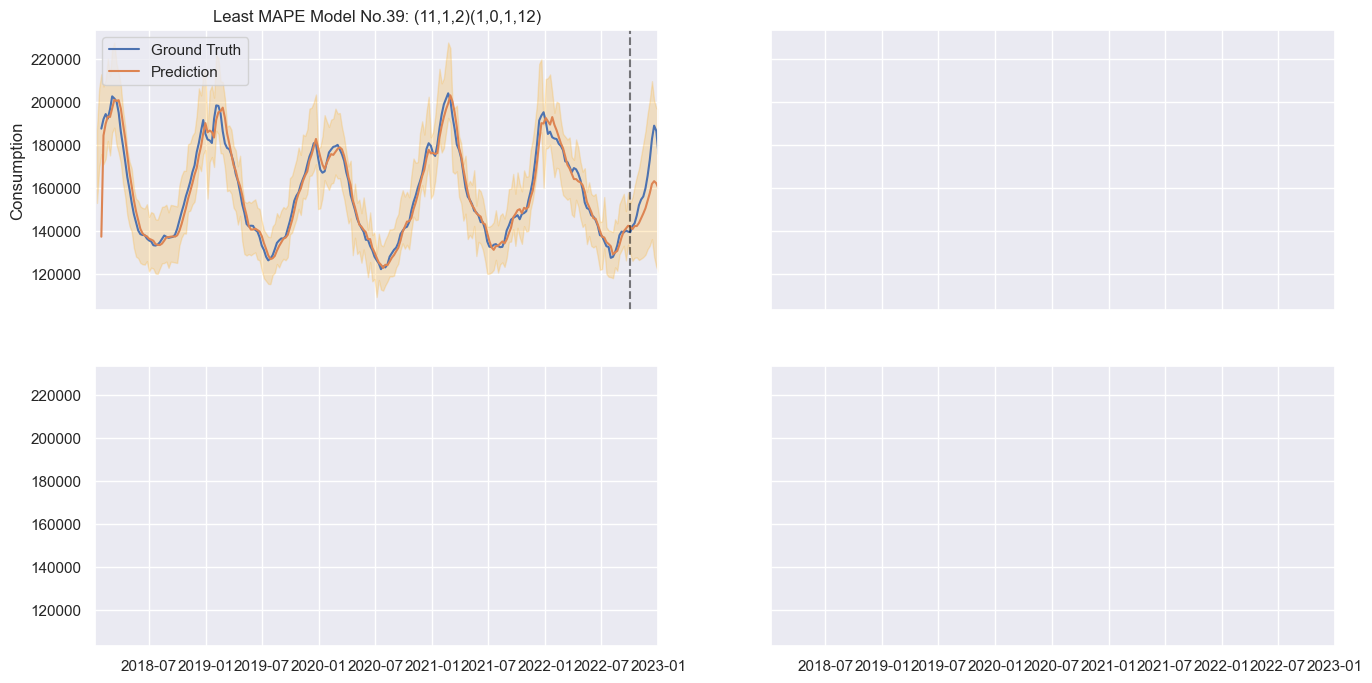

In [129]:
# fit the models of least MAPE, least RMSE, least AIC/BIC & least MAPE among least AIC/BIC
order_list = [(2, 1, 3)] #,(2, 1, 3), (1,1,3), (0,1,3)]
seasonal_order_list = [(1,0,1,52)] #, (1,0,1,52), (1,0,0,52),(1,0,0,52)]
y = weekly_sum_r_log['Consumption']
y1 = [] # prediction confidence interval lower boundary
y2 = [] # prediction confidence interval upper boundary

for i in range(1):
    model = SARIMAX(endog=train, order=order_list[i],
                    seasonal_order=seasonal_order_list[i])
    result = model.fit()
    pred_summary = result.get_prediction(y.index[0], y.index[-1]).summary_frame()
    pred_list = pred_summary['mean'].copy()
    y1.append(pred_summary['mean_ci_lower'])
    y2.append(pred_summary['mean_ci_upper'])


# visualize the results of the fitted models
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,8),
                        sharex=True, sharey=True)

titles = ['Least MAPE Model No.39: (11,1,2)(1,0,1,12)',
          'Least RMSE Model No. 42: (11,1,11)(1,0,1,12)',
          'Least AIC/BIC Model No. 11: (1,2,1)(1,2,1,12)',
          'Least MAPE among least AIC/BIC Model No. 20: (2,1,1)(1,2,1,12)']
k = 0
#for i in range(2):
#    for j in range(2):
#        axs[i,j].plot(np.exp(weekly_sum_EE_r_log['Consumption']).rolling(4).mean(), label='Ground Truth')
#        axs[i,j].plot(np.exp(pred_list[k]).rolling(4).mean(), label='Prediction')
#        axs[i,j].set_title(titles[k])
#        axs[i,0].set_ylabel('Consumption')
#        axs[i,j].legend()
#        axs[i,j].axvline(test.index[0], color='black', alpha=0.5, linestyle='--')
#        axs[i,j].fill_between(x=y1[k].index, y1=np.exp(y1[k]), y2=np.exp(y2[k]), color='orange', alpha=0.2)
#        axs[i,j].set_xlim(left=y.index[0], right=y.index[-1])
#        k += 1
#plt.show()
i = 0
j = 0
axs[i,j].plot(np.exp(weekly_sum_r_log['Consumption']).rolling(4).mean(), label='Ground Truth')
axs[i,j].plot(np.exp(pred_list).rolling(4).mean(), label='Prediction')
axs[i,j].set_title(titles[k])
axs[i,0].set_ylabel('Consumption')
axs[i,j].legend()
axs[i,j].axvline(test.index[0], color='black', alpha=0.5, linestyle='--')
axs[i,j].fill_between(x=y1[k].index, y1=np.exp(y1[k]), y2=np.exp(y2[k]), color='orange', alpha=0.2)
axs[i,j].set_xlim(left=y.index[0], right=y.index[-1])

plt.show()

In [130]:
test

Date
2022-10-02    11.851742
2022-10-09    11.896242
2022-10-16    11.896903
2022-10-23    11.953204
2022-10-30    11.979797
2022-11-06    11.965707
2022-11-13    11.934416
2022-11-20    12.046005
2022-11-27    12.117139
2022-12-04    12.139291
2022-12-11    12.159118
2022-12-18    12.182912
2022-12-25    12.062693
2023-01-01    11.878796
Name: d0_D0_m0, dtype: float64

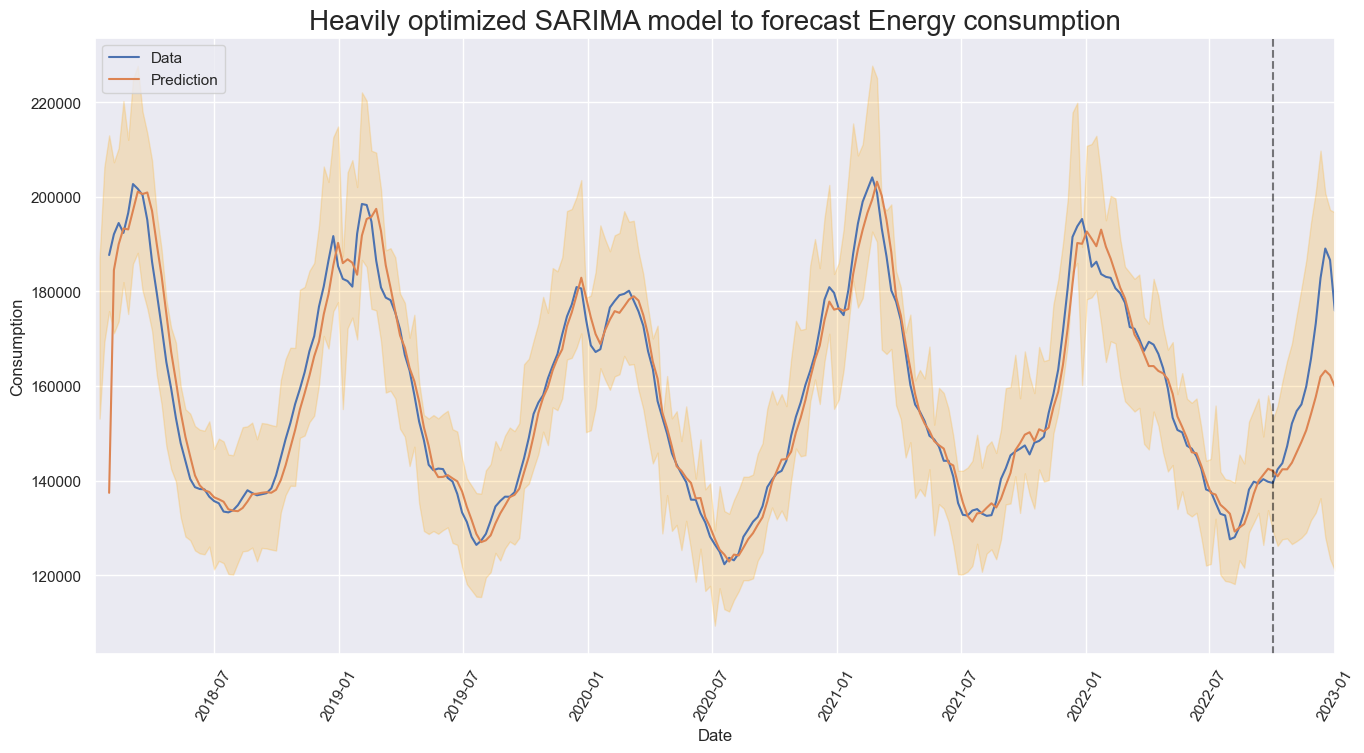

In [131]:
plt.figure(figsize=(16,8))
plt.title("Heavily optimized SARIMA model to forecast Energy consumption", fontsize=20)
plt.plot(np.exp(weekly_sum_r_log['Consumption']).rolling(4).mean(), label="Data")
plt.plot(np.exp(pred_list).rolling(4).mean(), label='Prediction')

plt.ylabel('Consumption')
plt.xlabel('Date')
plt.legend()
plt.axvline(test.index[0], color='black', alpha=0.5, linestyle='--')
plt.fill_between(x=y1[k].index, y1=np.exp(y1[k]), y2=np.exp(y2[k]), color='orange', alpha=0.2)
plt.xlim(left=y.index[0], right=y.index[-1])
plt.xticks(rotation=60)
plt.savefig("figure8.pdf")
plt.show()

In [132]:
new_df_R= pd.DataFrame()
new_df_R["Consumption real"] = np.exp(weekly_sum_r_log['Consumption'])
new_df_R["Consumption predicted"] = np.exp(pred_list)

In [133]:
new_df_R.head()

Consumption real  Consumption predicted
Date                                               
2018-01-07       169286.5881               1.000000
2018-01-14       190721.2722          169286.587195
2018-01-21       201737.6826          186912.708229
2018-01-28       189070.2842          193532.574970
2018-02-04       186837.9225          188375.674480

In [134]:
new_df_R = new_df_R.iloc[1:]

In [135]:
new_df_R.head() #Dropped the first row before this

Consumption real  Consumption predicted
Date                                               
2018-01-14       190721.2722          169286.587195
2018-01-21       201737.6826          186912.708229
2018-01-28       189070.2842          193532.574970
2018-02-04       186837.9225          188375.674480
2018-02-11       200231.9345          191128.380024

In [136]:
new_df_R["dConsumption"] = new_df_R["Consumption real"] - new_df_R["Consumption predicted"]

In [137]:
CoVData_EE.head()

New_cases
Date                 
2020-01-05          0
2020-01-12          0
2020-01-19          0
2020-01-26          0
2020-02-02          0

In [138]:
new_df = pd.DataFrame()
new_df = pd.merge(new_df_R, CoVData_EE, on="Date", how = "outer")

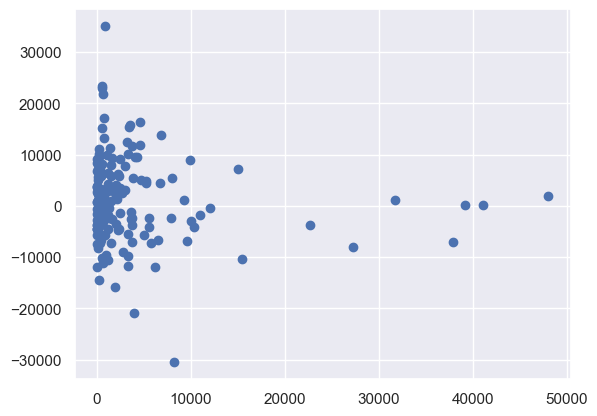

In [139]:
plt.scatter(new_df["New_cases"], new_df["dConsumption"])
#plt.xlim(pd.to_datetime("2020-01-01"), pd.to_datetime("2023-01-01"))

new_df["Consumption"] = new_df["dConsumption"]
new_df.reset_index(inplace=True)

Change country in parenthesis for correct countermeasure periods for respective country datasets chosen before

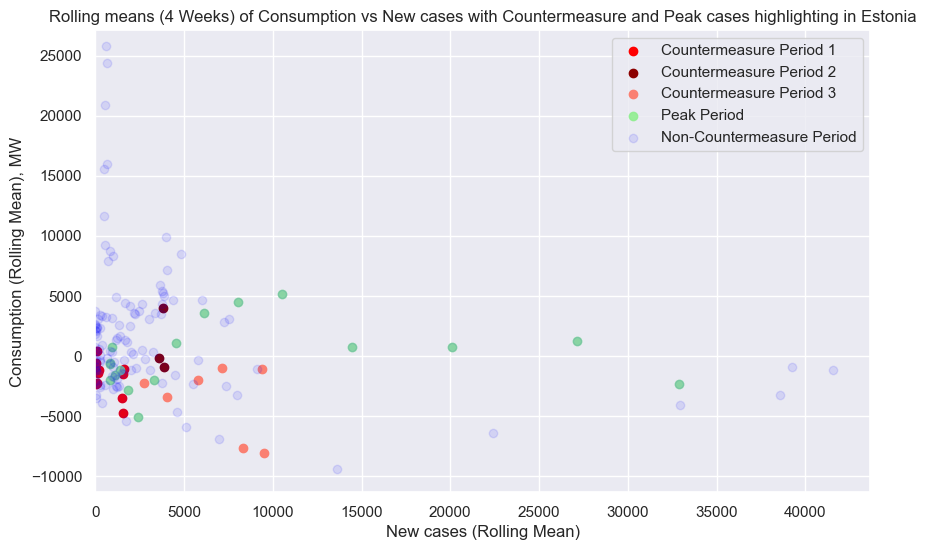

In [140]:
ScatterplotWithCountermeasure(new_df, "Estonia")

In [141]:
correlation_results = calculate_correlations(new_df, "Estonia")
print(correlation_results)


Overall Correlation: -0.1874 (P-Value: 0.0199)
Peak Correlation: 0.1735 (P-Value: 0.5055)
Countermeasure Correlations:
Countermeasure Period 1: -0.5049 (P-Value: 0.1367)
Countermeasure Period 2: 0.2541 (P-Value: 0.8365)
Countermeasure Period 3: -0.3922 (P-Value: 0.3842)
All Countermeasure Periods: -0.3898 (P-Value: 0.0893)
All Periods: 0.1331 (P-Value: 0.4323)

